### IML End Term - House Price Prediction Problem

* Name : R. Satish Srinivas Roll No:E21015
* Name : Vaibhav Varma Datla Vishnu Roll No: E21024        
* Name : Rakesh Babu Gedala Roll No: E21016  

In [4]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats

**The House Price Prediction Problem**

In [5]:
# read the csv file
data = pd.read_csv('wk3_kc_house_train_data.csv')

In [4]:
# setting the option to display all the columns
pd.set_option('display.max_columns', None)

In [3]:
# Looking into the data
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
9757,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
9758,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
9759,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [2]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


### 1. Question the data

**These are the Hypothesis that have been made**

Understand the variables very carefully and formulate your questions / hypothesis. (Note that these are just your initial hypothesis 
which may or may not seem to be true after the EDA step)

* id - no impact
* date of sale - no impact
* no. of bedrooms and bathrooms - will have an impact and proportional to the price - bathroom lot, bedroom no
* sqft_living,lot - will have an big impact and proportional to the price - sqft living yes, lot no
* floor - will have an impact and proportional to the price - not much, weird
* waterfront - some people may prefer homes with this, but won't have much impact. - no impact
* view - many prefer this in luxurious homes, may have an impact on price - no impact
* condition - this is impotant for selling house, so will affect the price a lot - not strong, but ok
* grade - will have good impact on the price  - has impact 

* sqft_above - this will be directly proportional to the price 
* sqft_basement - this will be directly proportional to the price 
* yr_built - This will have a big impact on price if the year renovated is empty for the house
* zipcode, lat, lon - these denote location, so will have a big impact on the price 
* sqft_living_15, lot_15 - might have some impact as it denotes neighbourhood details and it determines a land's price

* Zip- Code (implies location) plays an important role

* lat - long is an extension and gives precise location

* floors plays a key role ie., when compared with houses in the same location, the no of floors increase , the price increase

* yr_ renovated only when the yr_built is a while ago

* view, waterfront allure the buyers in rare events mostly occuring in high valued properties, most of the time they are secondary

* bed rooms +  sqft_living both weigh when we decide


* grade with which it is constructed plays a key role on the price

* Generally, For high price properties the diff between sqft_living and sqft_lot will be less


* Most of the time sqft_living = sqft_above + sqft_basement, so we can remove either the LHS or RHS



### 2. Variables EDA

### Bedrooms

In [57]:
# number of bedrooms
print("Bedrooms:")
print("Mean: ",data["bedrooms"].mean())
print("Nulls: ",data["bedrooms"].isnull().sum())
print("Median: ",data["bedrooms"].median())
print("Zeroes: ",(data["bedrooms"]==0).sum())
print("Min: ",(data["bedrooms"]).min())
print("Max: ",(data["bedrooms"]).max())


pd.crosstab(houses.bedrooms, columns="Counts")

# some zeroes, some outliers


Bedrooms:
Mean:  3.375883618481713
Nulls:  0
Median:  3.0
Zeroes:  6
Min:  0
Max:  33


col_0,Counts
bedrooms,
0,6
1,88
2,1255
3,4417
4,3094
5,755
6,116
7,17
8,7


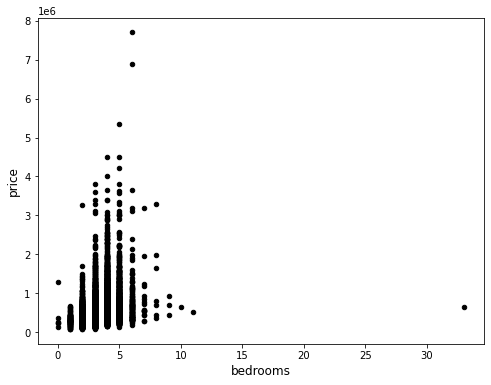

In [4]:
import matplotlib.pyplot as plt
#Scatter Plot 
data.plot(kind='scatter', x='bedrooms', y='price', color='black', figsize=(8,6))
plt.ylabel('price', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

# for each plot average price?

C:\Users\satish\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


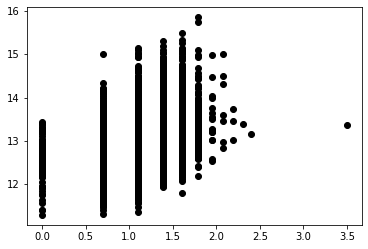

In [109]:
# Re-plot the scatter plot by taking the log transformation of both the variables. Does the linearity 
# Improve?
import numpy as np

plt.scatter(np.log(data.bedrooms), y=np.log(data.price), color='black')
plt.show()

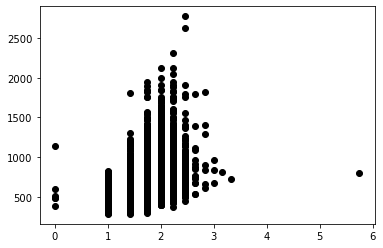

In [110]:
plt.scatter(np.sqrt(houses.bedrooms), y=np.sqrt(houses.price), color='black')
plt.show()

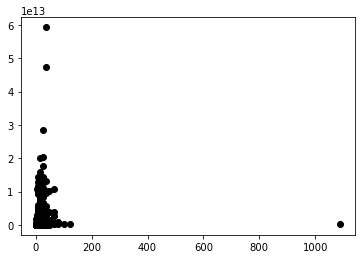

In [111]:
plt.scatter(np.square(houses.bedrooms), y=np.square(houses.price), color='black')
plt.show()

In [61]:
houses[["bedrooms","price"]].groupby(["bedrooms"]).mean()
houses[["bedrooms","price"]].groupby(["bedrooms"]).median()

# does seem to increase till 6, not sure after that due to less data

,price
bedrooms,
0,250000.0
1,307500.0
2,375000.0
3,405000.0
4,550000.0
5,614285.0
6,652500.0
7,580000.0
8,808000.0


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

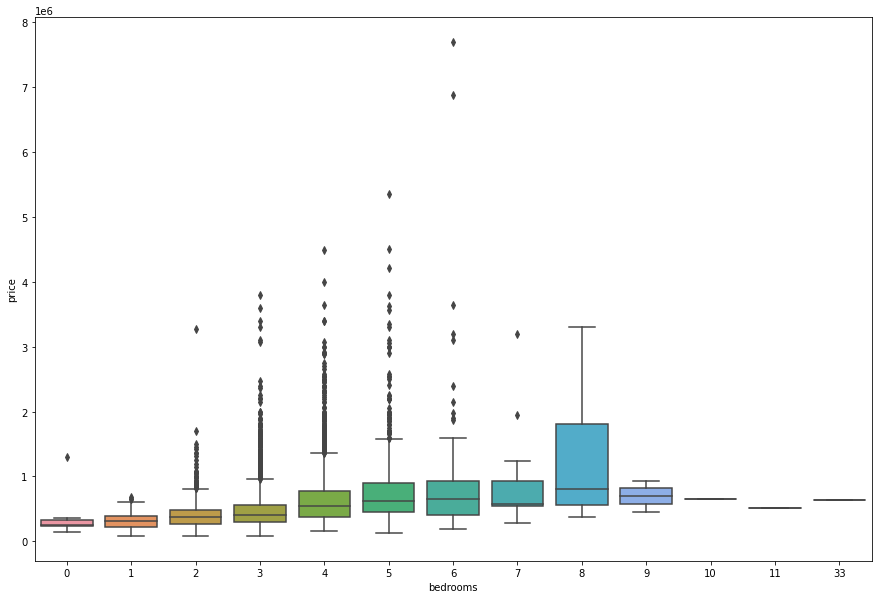

In [107]:
import seaborn as sns
# boxplot since discrete variable with less values
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x = houses['bedrooms'], y = houses['price'])


### Bathrooms

In [58]:
# number of bathrooms, where .5 accounts for a room with a toilet but no shower
print("Bathrooms:")
print("Mean: ",data["bathrooms"].mean())
print("Nulls: ",data["bathrooms"].isnull().sum())
print("Median: ",data["bathrooms"].median())
print("Zeroes:", (data["bathrooms"]==0).sum())
print("Min: ",(data["bathrooms"]).min())
print("Max: ",(data["bathrooms"]).max())

pd.crosstab(houses.bathrooms, columns="Counts")

# some zeroes some outliers, what is 0.25?

Bathrooms:
Mean:  2.117175494314107
Nulls:  0
Median:  2.25
Zeroes: 4
Min:  0.0
Max:  8.0


col_0,Counts
bathrooms,
0.00,4
0.75,37
1.00,1741
1.25,5
1.50,599
1.75,1431
2.00,871
2.25,937
2.50,2409


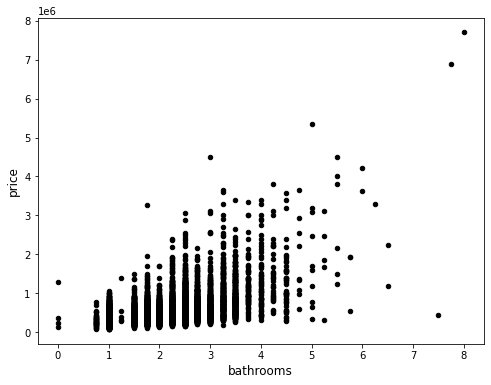

In [47]:
import matplotlib.pyplot as plt
#Scatter Plot 
data.plot(kind='scatter', x='bathrooms', y='price', color='black', figsize=(8,6))
plt.ylabel('price', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

# for each plot average price?

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

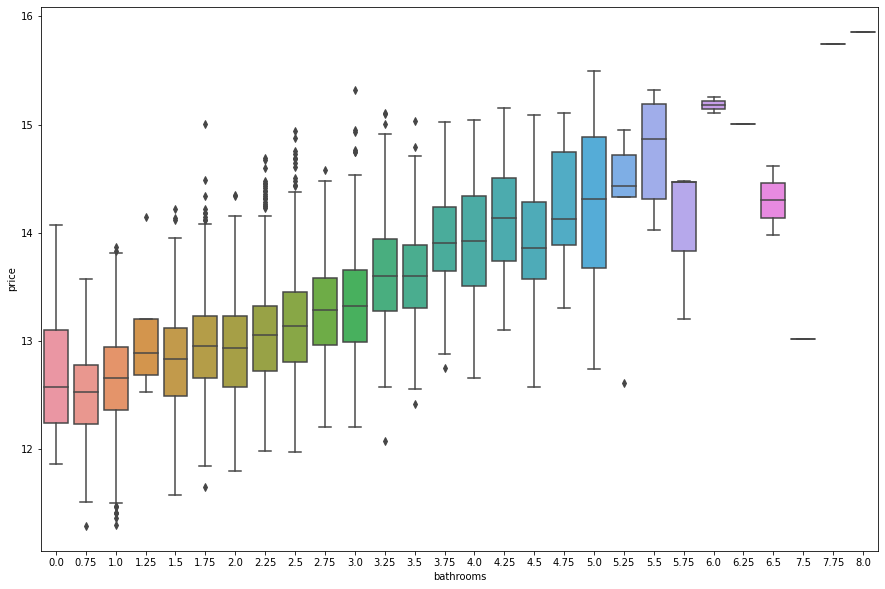

In [112]:

fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x = data['bathrooms'], y = np.log(houses['price']))


C:\Users\satish\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


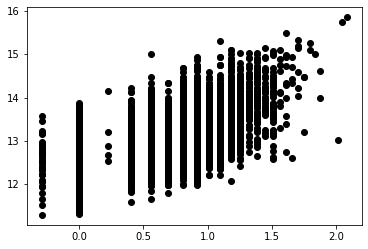

In [113]:
# Re-plot the scatter plot by taking the log transformation of both the variables. Does the linearity 
# Improve?
import numpy as np

plt.scatter(np.log(data.bathrooms), y=np.log(data.price), color='black')
plt.show()

In [62]:
data[["bathrooms","price"]].groupby(["bathrooms"]).median()

# mostly positive correlation but can't say for sure beyond 6.25 due to less data

,price
bathrooms,
0.00,295000.0
0.75,276000.0
1.00,315000.0
1.25,397500.0
1.50,375000.0
1.75,423000.0
2.00,414050.0
2.25,467000.0
2.50,510000.0


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

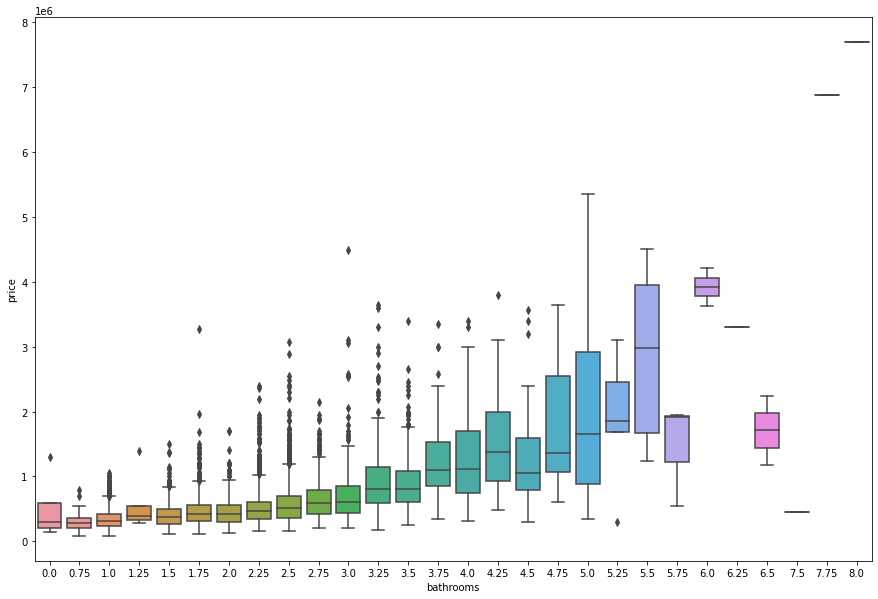

In [88]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x = data['bathrooms'], y = data['price'])


### Sqft_living

In [31]:
# square footage of the apartments interior living space
print("Sqft Living:")
print("Mean: ",data["sqft_living"].mean())
print("Nulls: ",data["sqft_living"].isnull().sum())
print("Median: ",data["sqft_living"].median())
print("Zeroes:", (data["sqft_living"]==0).sum())
print("Min: ",(data["sqft_living"]).min())
print("Max: ",(data["sqft_living"]).max())

# some outliers

Sqft Living:
Mean:  2086.734146091589
Nulls:  0
Median:  1910.0
Zeroes: 0
Min:  290
Max:  12050


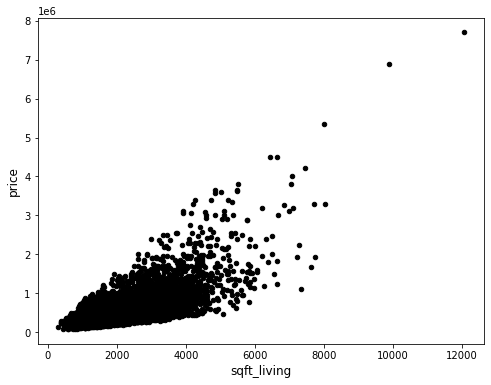

In [63]:
import matplotlib.pyplot as plt
#Scatter Plot 
data.plot(kind='scatter', x='sqft_living', y='price', color='black', figsize=(8,6))
plt.ylabel('price', fontsize=12)
plt.xlabel('sqft_living', fontsize=12)
plt.show()

# show positive correlation

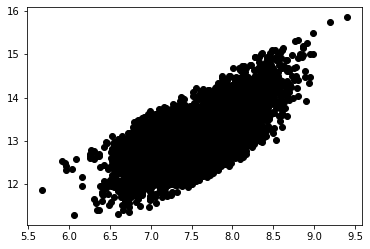

In [114]:
# Re-plot the scatter plot by taking the log transformation of both the variables. Does the linearity 
# Improve - yes, both log 
import numpy as np

plt.scatter(np.log(data.sqft_living), y=np.log(data.price), color='black')
plt.show()

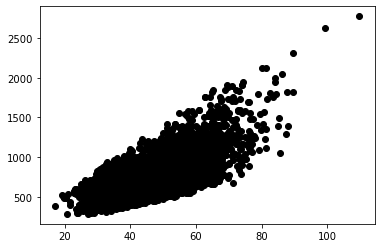

In [115]:
# Re-plot the scatter plot by taking the log transformation of both the variables. Does the linearity 
# Improve  
import numpy as np

plt.scatter(np.sqrt(data.sqft_living), y=np.sqrt(data.price), color='black')
plt.show()

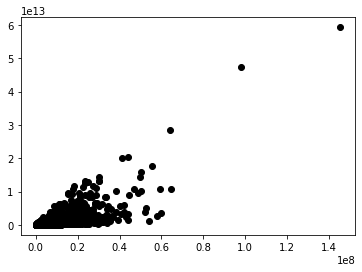

In [116]:
# Re-plot the scatter plot by taking the log transformation of both the variables. Does the linearity 
# Improve 
import numpy as np

plt.scatter(np.square(data.sqft_living), y=np.square(data.price), color='black')
plt.show()

### Sqft_lot

In [32]:
# square footage of the land space
print("Sqft Lot:")
print("Mean: ",data["sqft_lot"].mean())
print("Nulls: ",data["sqft_lot"].isnull().sum())
print("Median: ",data["sqft_lot"].median())
print("Zeroes:", (data["sqft_lot"]==0).sum())
print("Min: ",(data["sqft_lot"]).min())
print("Max: ",(data["sqft_lot"]).max())

# some outliers

Sqft Lot:
Mean:  15215.26062903391
Nulls:  0
Median:  7642.0
Zeroes: 0
Min:  520
Max:  1651359


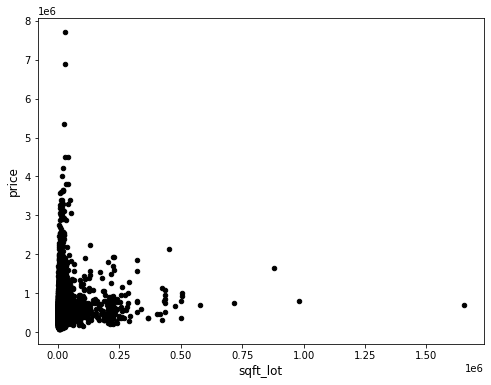

In [64]:
import matplotlib.pyplot as plt
#Scatter Plot 
houses.plot(kind='scatter', x='sqft_lot', y='price', color='black', figsize=(8,6))
plt.ylabel('price', fontsize=12)
plt.xlabel('sqft_lot', fontsize=12)
plt.show()

# deosn't seem to have positive correlation

# check with sqft_living, check for downward trend

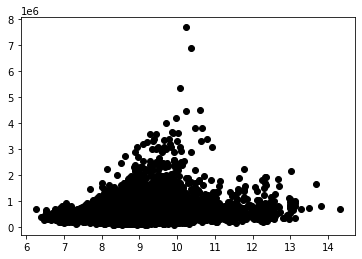

In [117]:
# Re-plot the scatter plot by taking the log transformation of both the variables. Does the linearity 
# Improve  
import numpy as np

plt.scatter(np.log(houses.sqft_lot), y=houses.price, color='black')
plt.show()

### number of floors

In [39]:
# number of floors
print("floors:")
print("Mean: ",data["floors"].mean())
print("Nulls: ",data["floors"].isnull().sum())
print("Median: ",data["floors"].median())
print("Zeroes:", (data["floors"]==0).sum())
print("Min: ",(data["floors"]).min())
print("Max: ",(data["floors"]).max())

pd.crosstab(houses.floors, columns="Counts")

# some outliers, 0.5?


floors:
Mean:  1.4860670013318307
Nulls:  0
Median:  1.5
Zeroes: 0
Min:  1.0
Max:  3.5


col_0,Counts
floors,
1.0,4862
1.5,867
2.0,3723
2.5,62
3.0,245
3.5,2


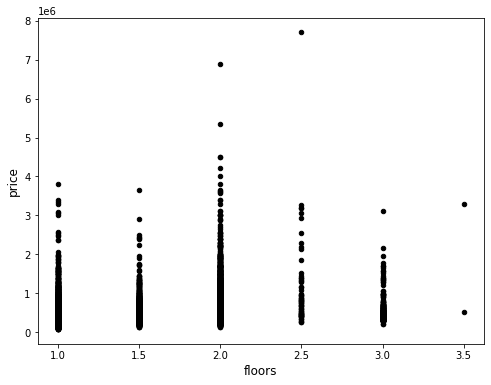

In [65]:
import matplotlib.pyplot as plt
#Scatter Plot 
data.plot(kind='scatter', x='floors', y='price', color='black', figsize=(8,6))
plt.ylabel('price', fontsize=12)
plt.xlabel('floors', fontsize=12)
plt.show()

# for each plot average price?

In [66]:
data[["floors","price"]].groupby(["floors"]).median()
# positive correlation till 2.5 but decreased at 3.0, so weird

,price
floors,
1.0,383075.0
1.5,536000.0
2.0,550000.0
2.5,802100.0
3.0,474950.0
3.5,1912500.0


<AxesSubplot:xlabel='floors', ylabel='price'>

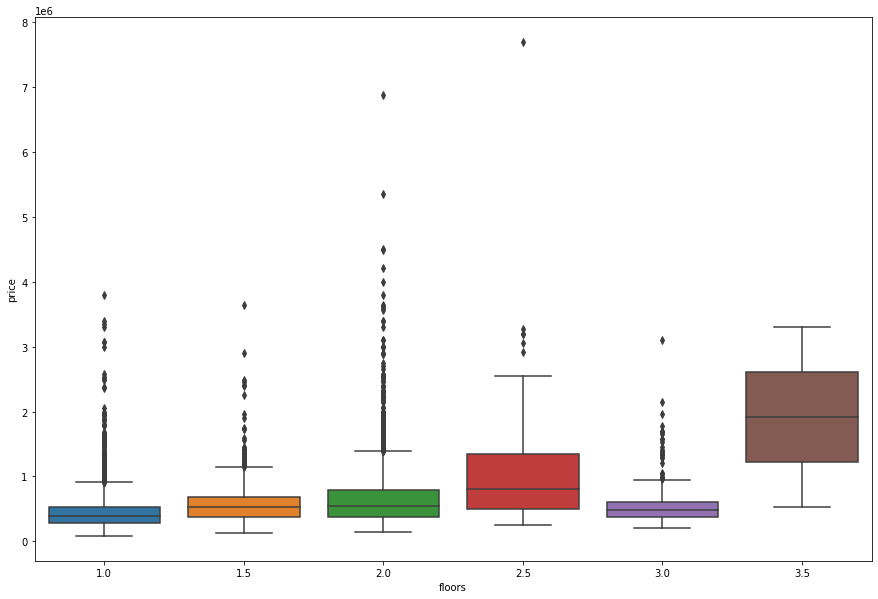

In [89]:

fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x = data['floors'], y = data['price'])


<AxesSubplot:xlabel='floors', ylabel='price'>

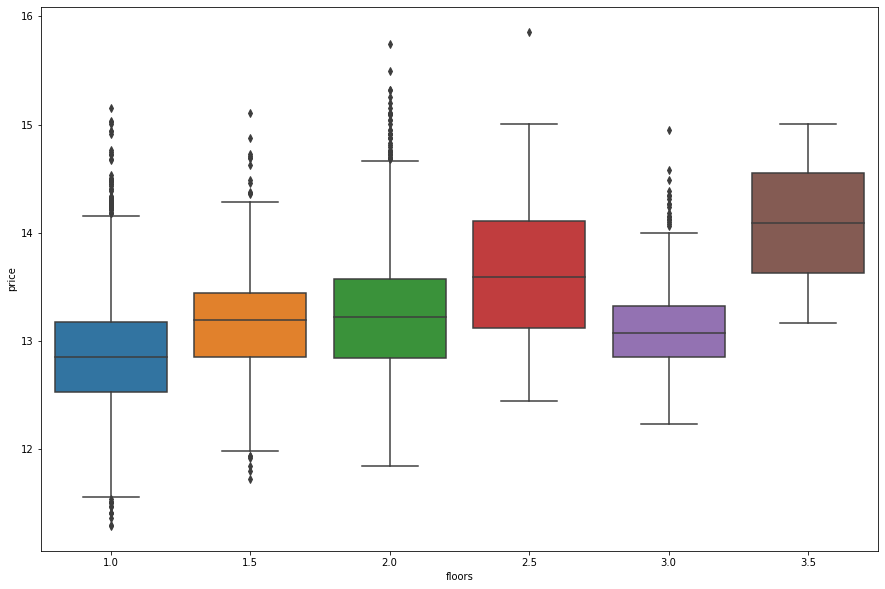

In [118]:

fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x = data['floors'], y = np.log(data['price']))


### waterfront

In [34]:
# apartment was overlooking the waterfront or not
print("waterfront:")
print("Nulls: ",data["waterfront"].isnull().sum())
print("Zeroes:", (data["waterfront"]==0).sum())
print("Ones:", (data["waterfront"]==1).sum())
print("Min: ",(data["waterfront"]).min())
print("Max: ",(data["waterfront"]).max())


# mostly 0 so biased, not useful

waterfront:
Nulls:  0
Zeroes: 9679
Ones: 82
Min:  0
Max:  1


<AxesSubplot:xlabel='waterfront', ylabel='price'>

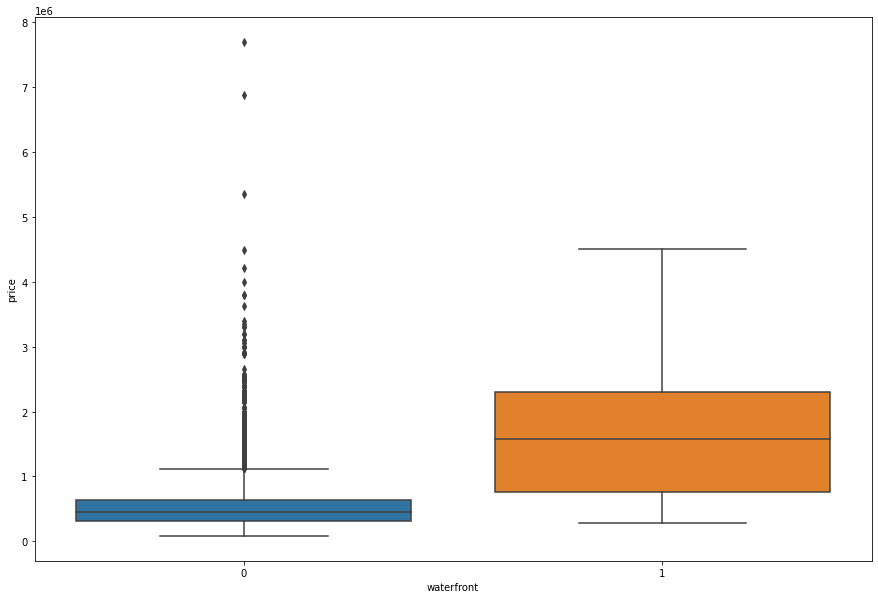

In [90]:

fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x = houses['waterfront'], y = houses['price'])


### VIEW

In [40]:
# how good the view of the property was
print("view:")
print("Mean: ",data["view"].mean())
print("Nulls: ",data["view"].isnull().sum())
print("Median: ",data["view"].median())
print("Zeroes:", (data["view"]==0).sum())
print("Min: ",(data["view"]).min())
print("Max: ",(data["view"]).max())

# mostly 0 rating , not helpful

pd.crosstab(houses.view, columns="Counts")


view:
Mean:  0.24802786599733634
Nulls:  0
Median:  0.0
Zeroes: 8748
Min:  0
Max:  4


col_0,Counts
view,
0,8748
1,160
2,454
3,243
4,156


<AxesSubplot:xlabel='view', ylabel='price'>

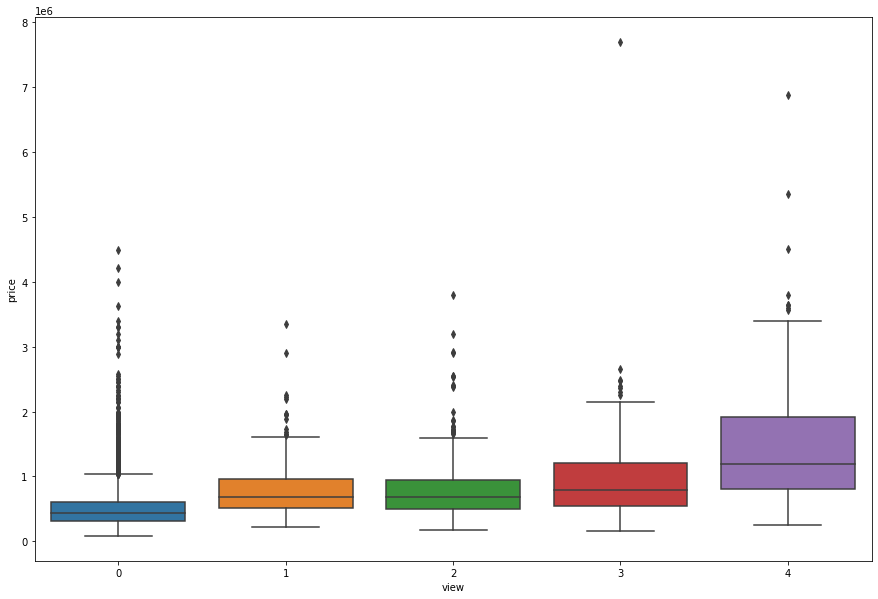

In [91]:

fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x = data['view'], y = data['price'])


### condition

In [41]:
# condition of the apartment
print("condition:")
print("Mean: ",data["condition"].mean())
print("Nulls: ",data["condition"].isnull().sum())
print("Median: ",data["condition"].median())
print("Zeroes:", (data["condition"]==0).sum())
print("Min: ",(data["condition"]).min())
print("Max: ",(data["condition"]).max())

pd.crosstab(houses.condition, columns="Counts")

# scale 1 - 5

condition:
Mean:  3.415531195574224
Nulls:  0
Median:  3.0
Zeroes: 0
Min:  1
Max:  5


col_0,Counts
condition,
1,10
2,78
3,6291
4,2610
5,772


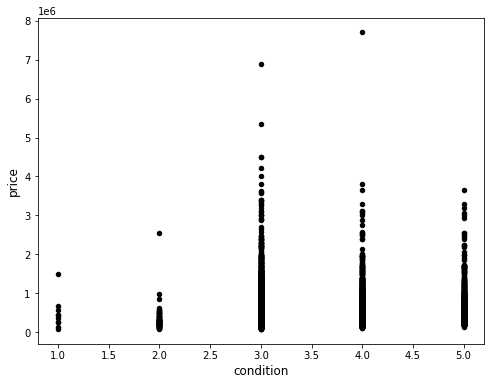

In [67]:
import matplotlib.pyplot as plt
#Scatter Plot 
data.plot(kind='scatter', x='condition', y='price', color='black', figsize=(8,6))
plt.ylabel('price', fontsize=12)
plt.xlabel('condition', fontsize=12)
plt.show()

# for each plot average price?

In [68]:
data[["condition","price"]].groupby(["condition"]).median()


,price
condition,
1,396000.0
2,269975.0
3,450000.0
4,436400.0
5,545000.0


<AxesSubplot:xlabel='condition', ylabel='price'>

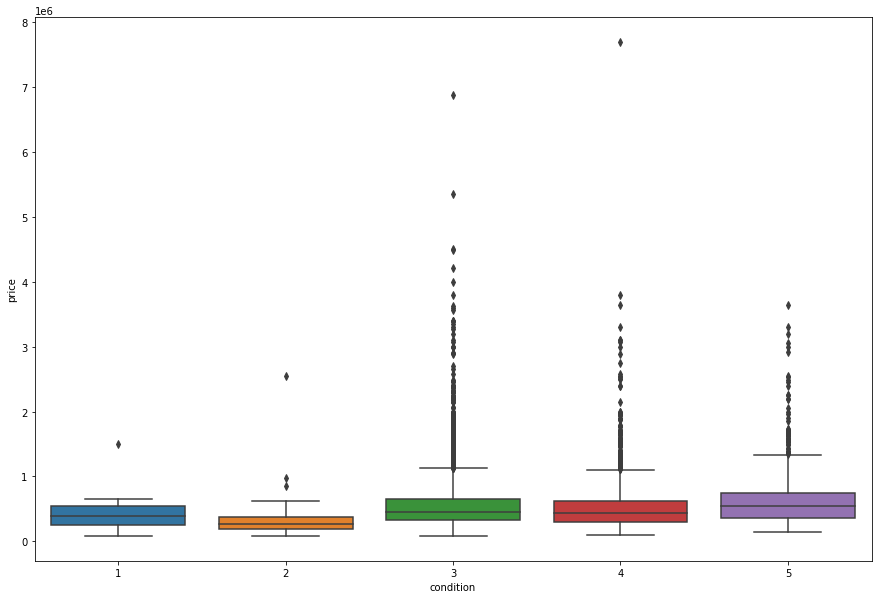

In [92]:

fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x = data['condition'], y = data['price'])

# not strong correlation

### Grade

In [42]:
# level of construction and design
print("grade:")
print("Mean: ",data["grade"].mean())
print("Nulls: ",data["grade"].isnull().sum())
print("Median: ",data["grade"].median())
print("Zeroes:", (data["grade"]==0).sum())
print("Min: ",(data["grade"]).min())
print("Max: ",(data["grade"]).max())

pd.crosstab(houses.grade, columns="Counts")

# scale 1 - 13, 

grade:
Mean:  7.661510091179182
Nulls:  0
Median:  7.0
Zeroes: 0
Min:  1
Max:  13


col_0,Counts
grade,
1,1
4,17
5,107
6,914
7,4067
8,2707
9,1192
10,532
11,172


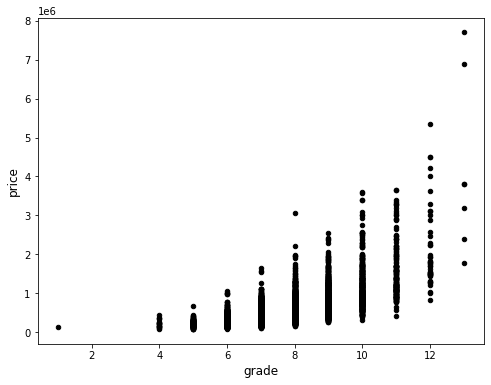

In [53]:
import matplotlib.pyplot as plt
#Scatter Plot 
houses.plot(kind='scatter', x='grade', y='price', color='black', figsize=(8,6))
plt.ylabel('price', fontsize=12)
plt.xlabel('grade', fontsize=12)
plt.show()

# for each plot average price?

In [69]:
houses[["grade","price"]].groupby(["grade"]).median()
# seems to have a positive correlation

,price
grade,
1,142000.0
4,217000.0
5,215000.0
6,280000.0
7,371000.0
8,506000.0
9,725944.0
10,911500.0
11,1295000.0


<AxesSubplot:xlabel='grade', ylabel='price'>

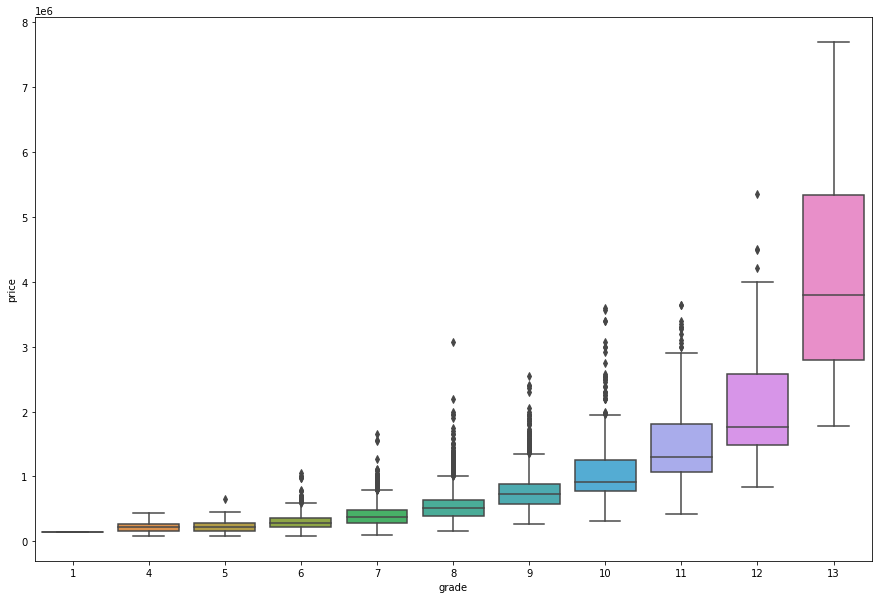

In [93]:

fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x = houses['grade'], y = houses['price'])


**grade with which it is constructed plays a key role on the price**

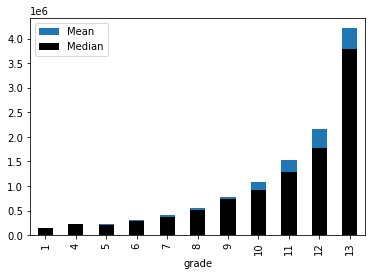

In [6]:
data.groupby('grade')['price'].mean().plot(kind ='bar', label = 'Mean')

data.groupby('grade')['price'].median().plot(kind ='bar', color = 'black', label = 'Median')

plt.legend()

plt.show()
# so we can conclude that a higher grade construction will lead to higher selling price

**Link between grades and no of houses sold**

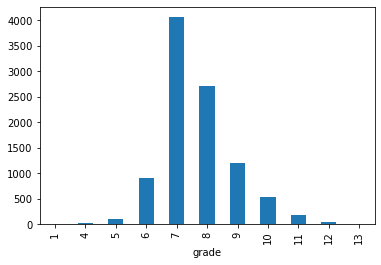

In [93]:
data.groupby('grade')['yr_built'].count().plot(kind = 'bar')

plt.show()

# Grade 7 and grade 8 are leading grades of houses sold

**Does high grade have lower no of renovations**

In [36]:
# no of houses that are having grades more than 1
# here grade 1 is sliced only for calculation purpose
data[data.grade !=1].groupby('grade')['yr_renovated'].count()

grade
4       17
5      107
6      914
7     4067
8     2707
9     1192
10     532
11     172
12      45
13       7
Name: yr_renovated, dtype: int64

In [27]:
# no of  houses that are renovated
# here we could see that the grade 1 is not present so hence removed in the previous step
data_copy = data[data.yr_renovated != 0].copy()

data_copy.groupby('grade')['yr_renovated'].count()

grade
4       1
5       3
6      46
7     154
8     120
9      61
10     27
11      7
13      2
Name: yr_renovated, dtype: int64

<AxesSubplot:xlabel='grade'>

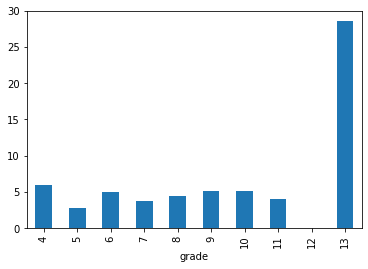

In [34]:
# slicing grade one as there is only one instance where  it is not renovated
data_groupby = data[data.grade !=1].groupby('grade')['yr_renovated'].count()

# taking into cosideration only the renovated spaces
data_copy = data[data.yr_renovated != 0].copy()

data_groupby_subset = data_copy.groupby('grade')['yr_renovated'].count()

final_data = (data_groupby_subset / data_groupby)*100

final_data.plot(kind = 'bar')

# here could see that nearly 30% of the 13-grade are being renovated, 
# this is odd as higher grade is should lead to lesser instances of renovation

#### Does age of the building affect prices

In [6]:
## created two new columns to check the age of the building and renovation flag

# renovated or not is indicated by column 'yes_ren' = 0 or 1.
house_ds = data.copy()
house_ds.loc[house_ds.yr_renovated == 0, 'yes_ren'] = 0
house_ds.loc[house_ds.yr_renovated > 0, 'yes_ren'] = 1

# age_ren indicates 'age of building/age since renovation(if renovated)'
house_ds.loc[house_ds.yr_renovated == 0, 'age'] = (house_ds.date.str.slice(0,4).astype(int)) - (house_ds.yr_built)
house_ds.loc[house_ds.yr_renovated > 0, 'age'] = (house_ds.date.str.slice(0,4).astype(int))  - (house_ds.yr_renovated)

house_ds.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yes_ren,age
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,0.0,49.0
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,0.0,13.0
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,300,1942,0,98115,47.6900,-122.292,1330,6000,0.0,72.0
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,0,1927,0,98028,47.7558,-122.229,1780,12697,0.0,87.0
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,0,1977,0,98074,47.6127,-122.045,1370,10208,0.0,37.0


In [ ]:
house_ds[house_ds.age < 0]

### there are 8 instances where 'year-built/year-renovated' is greater than 'year-sold'.
## assumed that the sale happens during construction/renovation.

In [8]:
# function age_bin: 
# age is dividied into bins of 10 and numeric values 10 to 100 are assigned for age of 10 to 100 years
# and value 120 is assigned to age more than 100.

def age_bin(x):
    if x < 10:
        y = 10
    elif x < 20:
        y = 20
    elif x < 30:
        y = 30
    elif x < 40:
        y = 40
    elif x < 50:
        y = 50
    elif x < 60:
        y = 60
    elif x < 70:
        y = 70
    elif x < 80:
        y= 80
    elif x < 90:
        y = 90
    elif x < 100:
        y = 100
    else:
        y = 120
        
    return y

house_ds2 = house_ds.copy()

house_ds2['age_bin'] = house_ds2.age.apply(age_bin)


In [10]:
# count of houses under each age_bin.
# 

pd.crosstab(house_ds2.age_bin, columns="Counts").T

age_bin,10,20,30,40,50,60,70,80,90,100,120
col_0,,,,,,,,,,,
Counts,1456,1315,1215,1251,945,1054,924,466,366,366,403


<AxesSubplot:xlabel='age_bin', ylabel='price'>

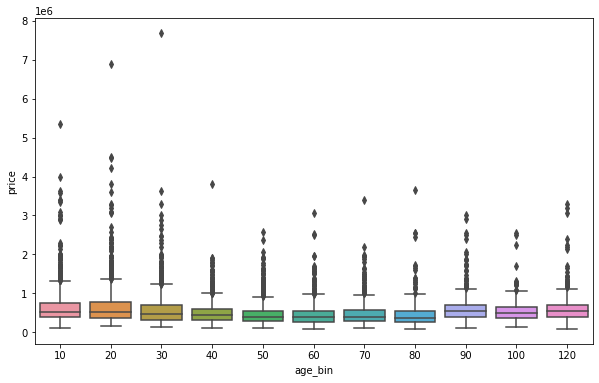

In [12]:
# boxplot of price for each age_bin

import seaborn as sns
fig,ax = plt.subplots(figsize=(10,6))
sns.boxplot(x = house_ds2['age_bin'], y = house_ds2['price'])

## # age does not seem to affect the price much as the 'median prices of houses' does not show any correlation wrt age_bin.

In [15]:
# year renovated indicator vs price of house

print('yr_renovated is yes(1) : price')
print('mean:',house_ds[house_ds.yr_renovated > 0].price.mean())
print('median:',house_ds[house_ds.yr_renovated > 0].price.median())


print('\nyr_renovated is no(0) : price')
print('mean:',house_ds[house_ds.yr_renovated == 0].price.mean())
print('median:',house_ds[house_ds.yr_renovated == 0].price.median())



# the mean/median sale price of renovated house is observed greater than non-renovated houses


yr_renovated is yes(1) : price
mean: 757336.8598574821
median: 595000.0

yr_renovated is no(0) : price
mean: 533061.7821199143
median: 447000.0


C:\Users\rajes\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


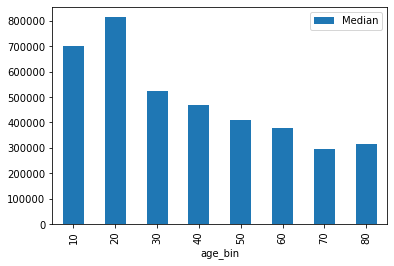

In [25]:
## for renovated houses, price vs age after renovation

ds_age = house_ds.copy()
#ds_age_without_ren indicats non-renovated houses
ds_age_without_ren = ds_age[ds_age.yes_ren == 0]
#ds_age_with_ren indicates renovated houses
ds_age_with_ren = ds_age[ds_age.yes_ren == 1]

ds_age_with_ren['age_bin'] = ds_age_with_ren.age.apply(age_bin)

ds_age_with_ren.groupby("age_bin")["price"].median().plot(kind= 'bar',label = 'Median')

plt.legend()
plt.show()


##  price is less for houses with 'higher age after renovation' 
## Overall, its observaed as higher the age after renovation, lower the price.

**For high priced locations, sqft_basement will be less**

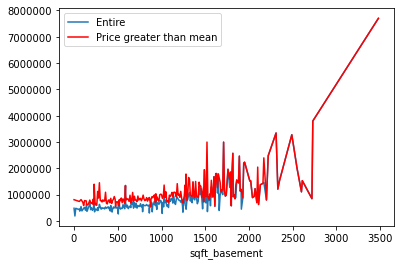

In [8]:
data.groupby('sqft_basement')['price'].mean().plot(kind = 'line', label = 'Entire')

# here the data is subsetted by taking on columns that are greater than mean

data_subset = data[data.price > data.price.mean()]

data_subset.groupby('sqft_basement')['price'].mean().plot(kind = 'line', color = 'red', label = 'Price greater than mean')


plt.ticklabel_format(useOffset=False, style='plain')
plt.legend()

plt.show()

# with this plot we can see that by sqft_basement alone the price is not been affected


<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

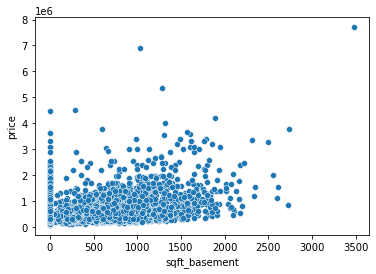

In [116]:
sns.scatterplot( x = data.sqft_basement, y = data.price)

# there isnt a strong corelation, but could see a general trend.

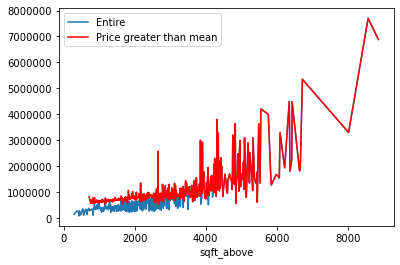

In [7]:
data.groupby('sqft_above')['price'].mean().plot(kind = 'line', label = 'Entire')

# here the data is subsetted by taking on columns that are greater than mean

data_subset = data[data.price > data.price.mean()]

data_subset.groupby('sqft_above')['price'].mean().plot(kind = 'line', color = 'red', label = 'Price greater than mean')

plt.ticklabel_format(useOffset=False, style='plain')

plt.legend()

plt.show()

# with this plot we can see that by sqft_above alone the price is not been affected
# also could see that a great variation in the prices


<AxesSubplot:xlabel='sqft_above', ylabel='price'>

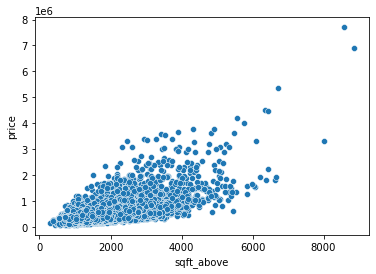

In [117]:
sns.scatterplot(x = data.sqft_above, y = data.price)

# here we could see a linear correlation between sqft_above and price

In [40]:
data_traversed = data[['price','sqft_above','sqft_basement','yr_built', 'yr_renovated']].copy()

In [47]:
data_traversed['diff_above_base'] = data_traversed.sqft_above - data_traversed.sqft_basement

<AxesSubplot:xlabel='diff_above_base', ylabel='price'>

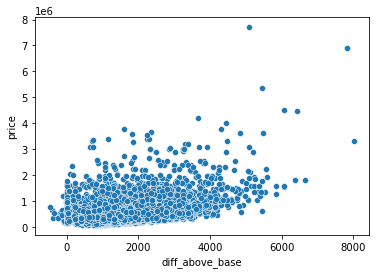

In [124]:
sns.scatterplot(x = data_traversed.diff_above_base,  y = data_traversed.price)

# here we could see that difference in above and basement is not dependent on the price
# here we can that there is no hard and fast rule about the basement is only for low or high prices houses
# but for further analysis, we add location into consideration as well.

**sqft_living = sqft_above + sqft_basement**

In [13]:
print(len(data_train['sqft_living']))
sum(data_train['sqft_living'] == data_train['sqft_above'] + data_train['sqft_basement'])

9761


9761

**yr_ renovated only when the yr_built is a while ago**

<AxesSubplot:xlabel='yr_built'>

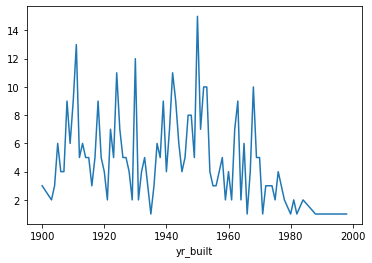

In [369]:
# here to check on a high level, houses that are renovated are only considered
# so the data frame subsetting is using yr_renovated not equal to zero
data_copy = data_train[data_train.yr_renovated != 0].copy()

data_copy.groupby('yr_built')['yr_renovated'].count().plot(kind = 'line')

# From the plot we can see that there is no correlation between yr_renovated and yr_built
# It may be because only one entry is given to yr_renovated, we can say that only the latest renovation is provided.
# so, as per the data we cant conclude, the year of renovation has no dependence on year built

**yr_ sold have an influence on  yr_ renovated**

In [54]:
data_traversed['yr_sold'] = data.date.apply(lambda x: x[0:4])

data_traversed['yr_sold'] = data_traversed['yr_sold'].astype('int')

<AxesSubplot:xlabel='yr_sold'>

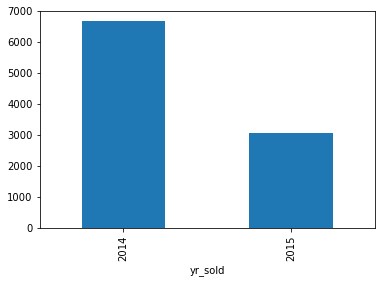

In [55]:
# this is hard to contemplate the hypothesis from the given data as the houses are only - 2015 and 2016 sold
# without the data from the other years it is hard to prove this hypothesis.

data_traversed.groupby('yr_sold')['yr_built'].count().plot(kind = 'bar')

**Zip- Code (implies location) plays an important role**

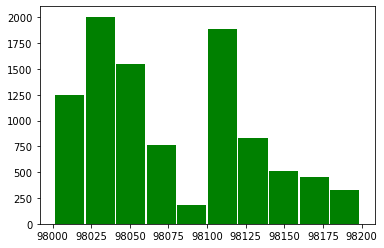

In [56]:
plt.bar(data.zipcode, rwidth= 0.95, color= 'green')

plt.show()

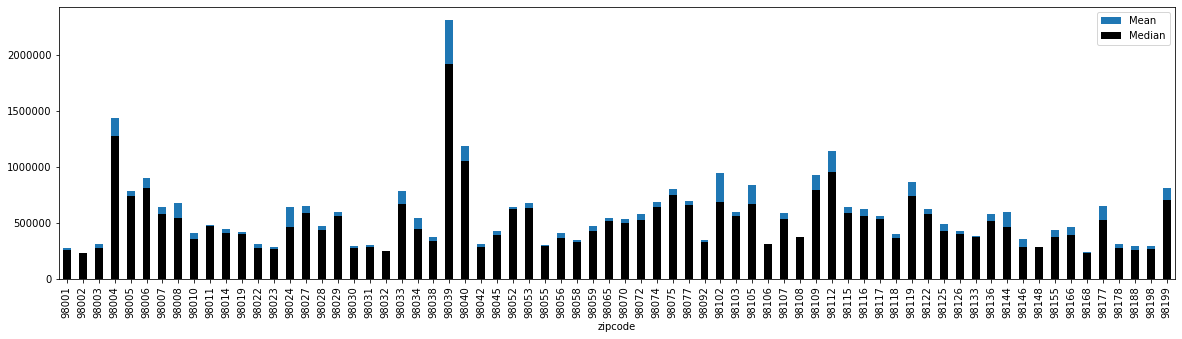

In [94]:
plt.figure(figsize=(20,5))

plt.ticklabel_format(useOffset=False, style='plain')

data.groupby('zipcode')['price'].mean().plot(kind = 'bar', label = 'Mean')

data.groupby('zipcode')['price'].median().plot(kind = 'bar', color = 'black', label = 'Median')

plt.legend()

plt.show()

# the average price per zip codes are mostly uniformly spread
# there is a zipcode that is costly - 98039

**Check whether the high performing zipcodes belong to the same place**

In [32]:
# as part of this analysis an extrernal data set is being used
data_zip = pd.read_csv('wa-zip-code-latitude-and-longitude.csv', sep= ';')

In [33]:
data_zip

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,98228,Bellingham,WA,48.814753,-121.988548,-8,1,"48.814753,-121.988548"
1,98235,Clearlake,WA,48.461672,-122.233080,-8,1,"48.461672,-122.23308"
2,98244,Deming,WA,48.841442,-122.125470,-8,1,"48.841442,-122.12547"
3,98908,Yakima,WA,46.605303,-120.617620,-8,1,"46.605303,-120.61762"
4,98126,Seattle,WA,47.546870,-122.374800,-8,1,"47.54687,-122.3748"
...,...,...,...,...,...,...,...,...
732,99338,Kennewick,WA,46.192356,-119.239820,-8,1,"46.192356,-119.23982"
733,98953,Zillah,WA,46.418933,-120.266990,-8,1,"46.418933,-120.26699"
734,98373,Puyallup,WA,47.147862,-122.318640,-8,1,"47.147862,-122.31864"
735,98509,Lacey,WA,46.978118,-122.702393,-8,1,"46.978118,-122.702393"


In [34]:
# a function is being defined to map the zip code with city
# 98077 is not present in the zip code data, so it is being hardcoded
def zip_to_city(x):
    
    data_zip = pd.read_csv('wa-zip-code-latitude-and-longitude.csv', sep= ';')
    
    city_name = 'None'
    
    if sum(data_zip.Zip == x) == 1:
        
        city_name = data_zip[data_zip.Zip == x].iloc[0,1]
    elif x == 98077:
        city_name = 'Woodinville'
    
    return city_name
    

In [35]:
# using the apply function to apply it on each row
data['city'] = data.zipcode.apply(zip_to_city)

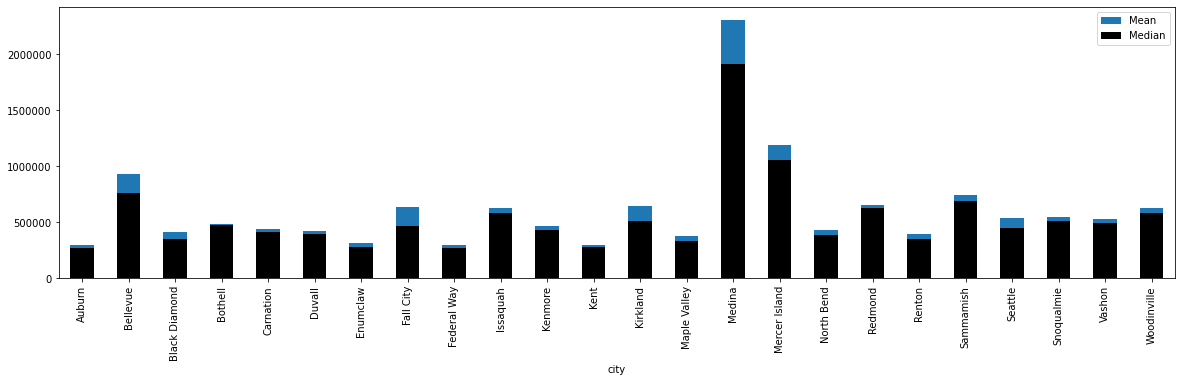

In [12]:
data_groupby_city_price_mean = data.groupby('city')['price'].mean()

plt.figure(figsize=(20,5))

plt.ticklabel_format(useOffset=False, style='plain')

data.groupby('city')['price'].mean().plot(kind = 'bar',  label = 'Mean')

data.groupby('city')['price'].median().plot(kind = 'bar', color = 'black',  label = 'Median')

plt.legend()

plt.show()

# here we could see that Median and Mercer Island Have high average price 
# mean of most of the cities is uniform
# median of medina is away from the mean, which may be influenced by an extemes

**No of high priced houses in each city**

<AxesSubplot:xlabel='city'>

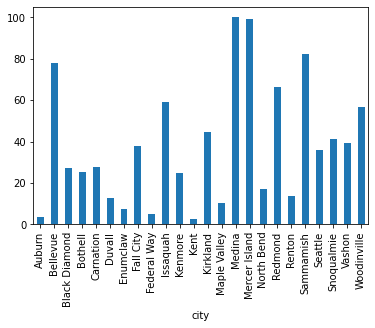

In [65]:
data_subset = data[data.price > data.price.mean()]

data_groupby_subset = data_subset.groupby('city')['zipcode'].count() 

data_groupby = data.groupby('city')['price'].count()

final_data = (data_groupby_subset / data_groupby)*100

final_data.plot(kind = 'bar')

# could see that Median, Mercer Islands and Bellevue cities have high no of houses with more than average sale price

**sqft_living15 relation with price**

In [16]:
data_traversed_area = data[['price','sqft_living', 'sqft_lot','sqft_living15', 'sqft_lot15']].copy()

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

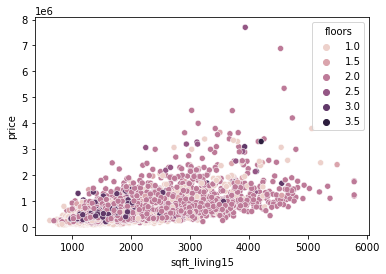

In [17]:
sns.scatterplot(x = data_traversed_area.sqft_living15, y = data_traversed_area.price,hue = data.floors)

# couldnt see a positive relation
# could see that the floors of 3 and more at lower price and lower sqft_living

**What if the house size (living space) is more than the average (living space for nearest 15), will it influence the price**

In [113]:
data_traversed_area['diff_liv_and_liv15'] = data_traversed_area.sqft_living - data_traversed_area.sqft_living15

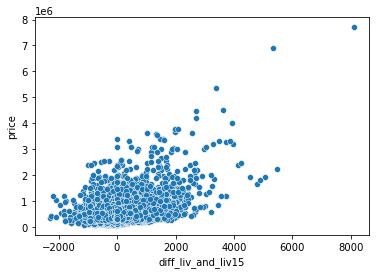

In [125]:
sns.scatterplot(x = data_traversed_area.diff_liv_and_liv15, y =  data_traversed_area.price)

plt.show()

# there is no direct trend, ie., 
# if a house is having more than the average living space, that is not influencing the price

**sqft_lot15 relation with price**

In [137]:
data_traversed_area.sqft_lot15.describe()

count      9761.000000
mean      12824.785165
std       26518.337402
min         660.000000
25%        5160.000000
50%        7660.000000
75%       10113.000000
max      560617.000000
Name: sqft_lot15, dtype: float64

<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

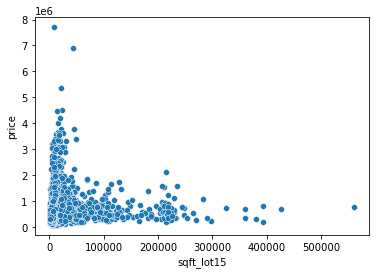

In [121]:
sns.scatterplot(x = data_traversed_area.sqft_lot15, y = data_traversed_area.price)

In [126]:
data_traversed_area['diff_lot_and_lot15'] = data_traversed_area.sqft_lot - data_traversed_area.sqft_lot15

<AxesSubplot:xlabel='diff_lot_and_lot15', ylabel='price'>

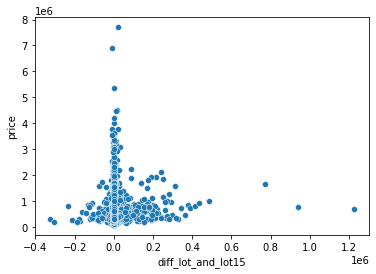

In [203]:
sns.scatterplot(x = data_traversed_area.diff_lot_and_lot15, y = data_traversed_area.price)

# here we could that there is a high range of prices, when the difference is zero.

### Correlation graphs

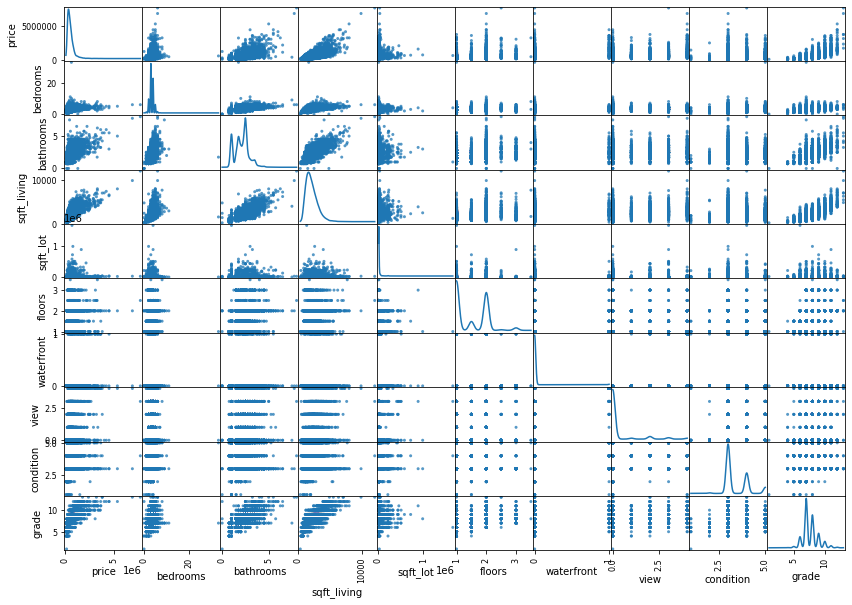

In [56]:
#Exporting Graph

from pandas.plotting import scatter_matrix

scatter_matrix(data.drop(["id", "date", "sqft_above", "sqft_basement", "yr_built","yr_renovated","zipcode",
                           "lat","long","sqft_living15","sqft_lot15"], axis=1), alpha = 0.75, figsize=(14,10), diagonal = 'kde')
plt.savefig('scatter.png')
plt.show()

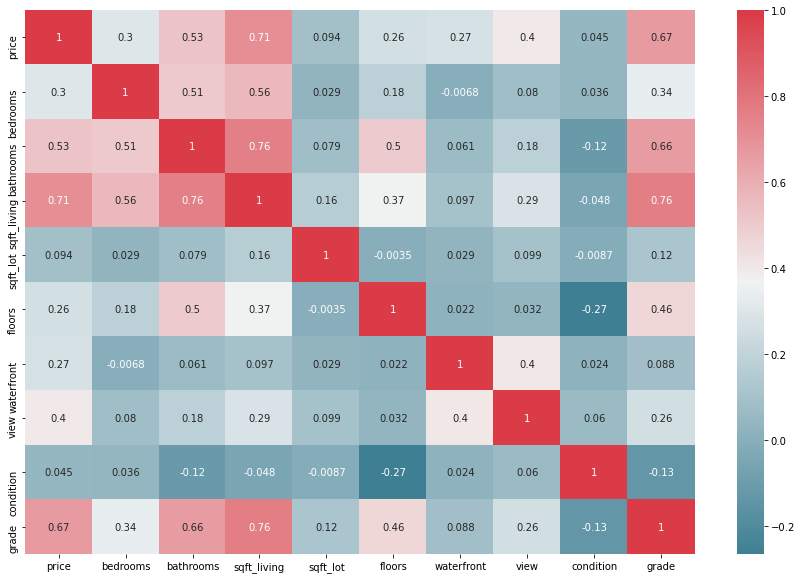

In [96]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df1.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(houses.drop(["id", "date", "sqft_above", "sqft_basement", "yr_built","yr_renovated","zipcode",
                           "lat","long","sqft_living15","sqft_lot15"], axis=1))

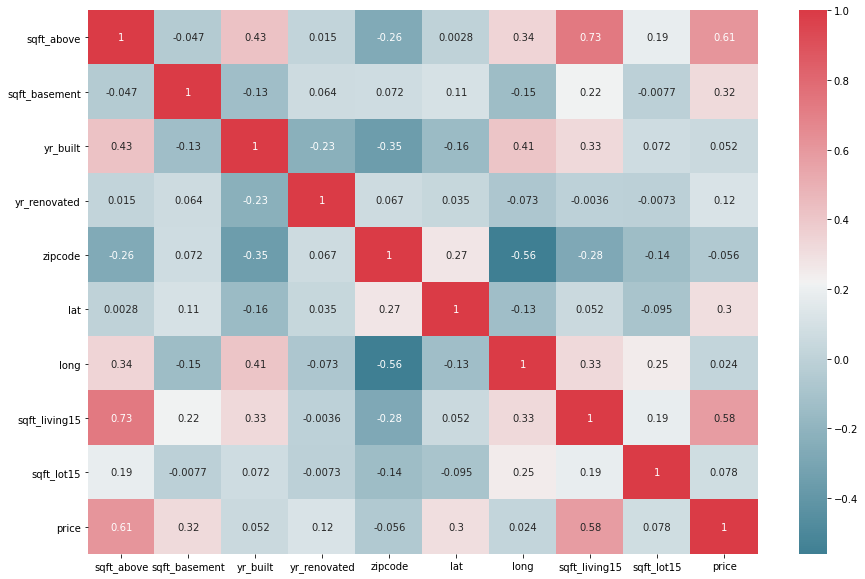

In [7]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df1.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(houses[[ "sqft_above", "sqft_basement", "yr_built","yr_renovated","zipcode",
                           "lat","long","sqft_living15","sqft_lot15",'price']])

# Grade , sqft_above,sqft_living15 have high impact on price

In [146]:
data_traversed_area[['sqft_living', 'sqft_lot','sqft_living15', 'sqft_lot15']].std()

# here could see a high standard deviation sqft_lot and sqft_lot15

sqft_living        927.194303
sqft_lot         41266.734598
sqft_living15      687.322247
sqft_lot15       26518.337402
dtype: float64

In [106]:
# check 3 columns relationship
data[["sqft_living", "sqft_basement","sqft_above"]]

data[data.sqft_living == data.sqft_basement + data.sqft_above]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
9757,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
9758,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
9759,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


**Latitude and Longitude Impact**

In [14]:
data_position = data[['price','lat','long']]

In [18]:
data_position

,price,lat,long
0,604000.0,47.5208,-122.393
1,1225000.0,47.6561,-122.005
2,468000.0,47.6900,-122.292
3,310000.0,47.7558,-122.229
4,400000.0,47.6127,-122.045
...,...,...,...
9756,429000.0,47.5699,-122.288
9757,610685.0,47.5137,-122.167
9758,1007500.0,47.5537,-122.398
9759,402101.0,47.5944,-122.299


<AxesSubplot:xlabel='lat', ylabel='long'>

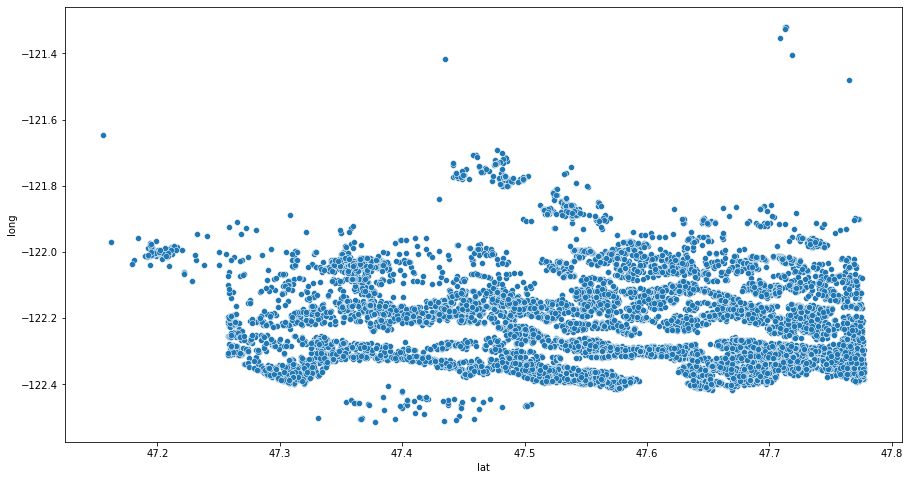

In [16]:
# ploting latitude and longitudes on scatter plot
plt.figure(figsize = (15,8))
sns.scatterplot(x = data_position.lat,y = data_position.long)

In [18]:
# importing knn regressor module from sklearn neighbors package 
from sklearn.neighbors import KNeighborsRegressor

In [19]:
data_position = data.copy()

In [20]:
X = data_position[['lat','long']]

y = data_position['price']

In [21]:
knn =  KNeighborsRegressor( n_neighbors= 10, metric = 'haversine')

In [22]:
knn.fit(X,y)

KNeighborsRegressor(metric='haversine', n_neighbors=10)

In [23]:
y_pred = knn.predict(X)

In [24]:
data['prices_nearby_10'] = y_pred

<AxesSubplot:xlabel='id', ylabel='price'>

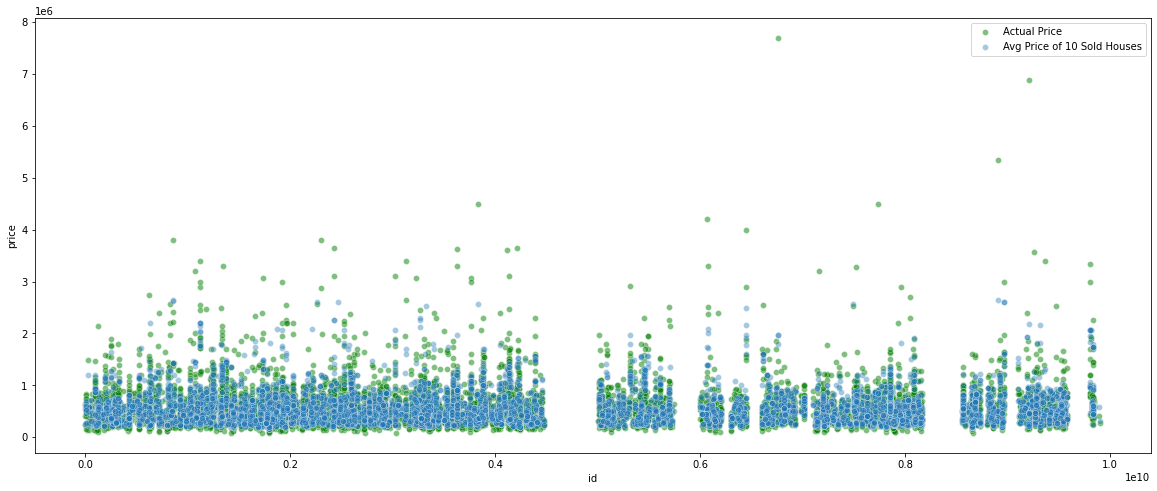

In [26]:
plt.figure(figsize=(20,8))

sns.scatterplot(x = data.id, y = data.price, color = 'green',alpha = 0.5, label = "Actual Price")

sns.scatterplot(x = data.id, y = data.prices_nearby_10, alpha = 0.4, label = "Avg Price of 10 Sold Houses")

# could see prices away (green marks) from the average prices, which can be interpreted as there are oultiers in the data

**Seasonality Check**

<AxesSubplot:xlabel='month', ylabel='price'>

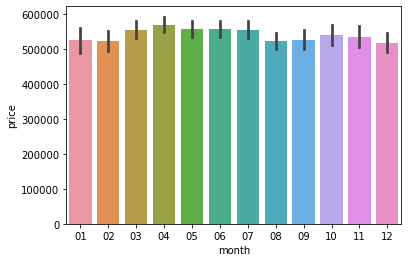

In [41]:
data_with_month = pd.DataFrame()
data_with_month['month'] = data['date'].apply(lambda x:x[4:6]).sort_values()


sns.barplot(x = data_with_month['month'], y = data['price'])

# Couldnt find any seasonality affect on months

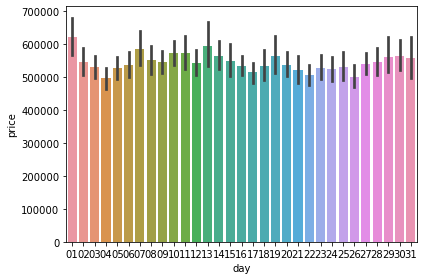

In [27]:
data_with_day = pd.DataFrame()
data_with_day['day'] = data['date'].apply(lambda x:x[6:8]).sort_values()

sns.barplot(x = data_with_day['day'], y = data['price'])

plt.tight_layout()

# Couldnt find any seasonality affect on days of the month sold

**Checking for any duplicate id values**

In [5]:
data.groupby('id')['price'].count().sort_values(ascending = False).head(30)

id
795000620     3
7856400240    2
1788900230    2
2473380920    2
1523049207    2
3332000615    2
705730280     2
7129304540    2
109200390     2
1232000810    2
2019200220    2
1524079093    2
7524400250    2
1788800630    2
1825069031    2
1139600270    2
251300110     2
8564860270    2
2724049222    2
8682262400    2
2231500030    2
9809000020    2
1781500435    2
9828200460    2
6021500970    2
7227800055    2
6021501535    2
2143700830    2
1568100300    2
7853420110    2
Name: price, dtype: int64

In [40]:
df = data.groupby('id')['price'].count().sort_values(ascending = False)

In [42]:
id_with_mul_entries = list(df[df.values > 1].index)

In [43]:
data_copy = data.copy()

In [44]:
data_copy['multi_sales'] = data_copy.id.apply(lambda x: True if x in id_with_mul_entries else False)

In [48]:
data_multi = data_copy[data_copy.multi_sales == True].copy()

In [49]:
data_multi[data_multi.id  == 795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,prices_nearby_10,multi_sales
7990,795000620,20140924T000000,115000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,Seattle,229345.0,True
7991,795000620,20141215T000000,124000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,Seattle,229345.0,True
7992,795000620,20150311T000000,157000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,Seattle,229345.0,True


In [50]:
data_multi.drop(['city', 'multi_sales', 'zipcode','lat', 'long', 'yr_built'], axis = 1, inplace = True)

In [325]:
data_multi

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,prices_nearby_10
43,6021501535,20140725T000000,430000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,0,1570,4500,507295.0
44,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,0,1570,4500,507295.0
165,2231500030,20141001T000000,315000.0,4,2.25,2180,10754,1.0,0,0,5,7,1100,1080,0,1810,6929,371120.0
166,2231500030,20150324T000000,530000.0,4,2.25,2180,10754,1.0,0,0,5,7,1100,1080,0,1810,6929,371120.0
384,8682262400,20140718T000000,430000.0,2,1.75,1350,4003,1.0,0,0,3,8,1350,0,0,1350,4479,448095.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9334,2724049222,20141201T000000,220000.0,2,2.50,1000,1092,2.0,0,0,3,7,990,10,0,1330,1466,350580.0
9357,8564860270,20140708T000000,449990.0,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,0,2680,5992,542592.2
9358,8564860270,20150330T000000,502000.0,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,0,2680,5992,542592.2
9739,7853420110,20141003T000000,594866.0,3,3.00,2780,6000,2.0,0,0,3,9,2780,0,0,2850,6000,562674.9


In [52]:
list_col = (data_multi.drop(columns='date', axis = 1).columns)

list_col

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15',
       'prices_nearby_10'],
      dtype='object')

In [53]:
data_multi_diff = pd.DataFrame(columns= list_col)

In [54]:
list_col_without_id= (data_multi.drop(columns=['date','id'], axis = 1).columns)

for i in id_with_mul_entries:
    
    if i != 795000620:
       
        other_metric_1 = data_multi[data_multi.id == i].iloc[0,:].values[2:]

        other_metric_2 = data_multi[data_multi.id == i].iloc[1,:].values[2:]

        diff_metric = pd.Series(other_metric_1 - other_metric_2, index = list_col_without_id)

        full_series = pd.Series(i,index = ['id']).append(diff_metric)

        data_multi_diff = data_multi_diff.append(full_series,ignore_index= True)


In [55]:
# From could see that only the price is been change
# there is no change in other values

data_multi_diff

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,prices_nearby_10
0,7856400240,-30000.0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0
1,1788900230,-113450.0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0
2,2473380920,-132675.0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0
3,1523049207,-59000.0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0
4,3332000615,-79000.0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0
5,705730280,-10000.0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0
6,7129304540,-307000.0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0
7,109200390,-5000.0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0
8,1232000810,-197000.0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0
9,2019200220,-109000.0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0


### 3) Initial model fitting step

In [28]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score

**One Hot Encoding for cities**

In [36]:
one_hot_city = pd.get_dummies(data.city, drop_first=True)

In [41]:
lin_city = LinearRegression()


scores = cross_val_score(lin_city, one_hot_city,data['price'], cv=10, scoring = "r2")

print('R2 Score:',scores.mean())

# Could see an explainablity factor of 0.24 which is not bad

R2 Score: 0.24680284130299723


**One Hot Encoding for zipcodes**

In [42]:
one_hot_zip = pd.get_dummies(data.zipcode, drop_first=True)

In [43]:
lin_zip = LinearRegression()

scores = cross_val_score(lin_zip, one_hot_zip,data['price'], cv=10, scoring = "r2")

print('R2 Score:',scores.mean())

# Could see an explainablity factor of 0.39 which is high for a single factor

R2 Score: 0.39500225180190507


**Model Fitting - for attributes that were promising while EDA - Using Cities**

In [44]:
data_test_1 = data[['bedrooms', 'bathrooms', 'sqft_living', 'grade','sqft_living15']].copy()

In [45]:
data_test_1 = pd.concat([data_test_1,one_hot_city],axis = 1)

In [46]:
lin = LinearRegression()


scores = cross_val_score(lin, data_test_1,data['price'], cv=10, scoring = "r2")

print('R2 Score:',scores.mean())

# Could see an explainablity factor of 0.668 which is an increase from the single factor

R2 Score: 0.6686151112067971


**Model Fitting - for attributes that were promising while EDA - Using ZipCodes**

In [50]:
data_test_2 = data[['bedrooms', 'bathrooms', 'sqft_living', 'grade','sqft_living15']].copy()

In [51]:
data_test_2 = pd.concat([data_test_2,one_hot_zip],axis = 1)

In [54]:
lin = LinearRegression()

scores = cross_val_score(lin, data_test_2,data['price'], cv=10, scoring = "r2")

print('R2 Score:',scores.mean())

# Could see an explainablity factor of 0.741 which is an increase from the single factor and outperforming cities

R2 Score: 0.7410181088437457


### 4) Feature engineering

**Transformation**

In [19]:
# Checking for sqft_living15 and sqft_lot15
data_truncated = data[['sqft_living15', 'sqft_lot15']]

In [25]:
# a function is defined to plt a scatter plot
# the inputs are dataframes types
def scatter_plot(data, data_transformed):
    
    col_len = len(data_transformed.columns)
    
    
    row_n = 1
    
    for i in data_transformed.columns:
        
        plt.figure(figsize = (10,5))
        
        plt.subplot(row_n,col_len, 1)
        plt.scatter(x = data[i], y = data['price'])
        
        plt.xlabel('%s'%i)
        plt.ylabel('price')
        plt.title('Original- %s'%i)
        
        plt.subplot(row_n,col_len, 2)
        plt.scatter(x=  data_transformed[i], y = data['price'])
        
        plt.xlabel('%s'%i)
        plt.ylabel('price')
        plt.title('Transformed- %s'%i)          
        
        row_n =+ 1
        
        plt.show()
    
    

**Applying Log Transformation**

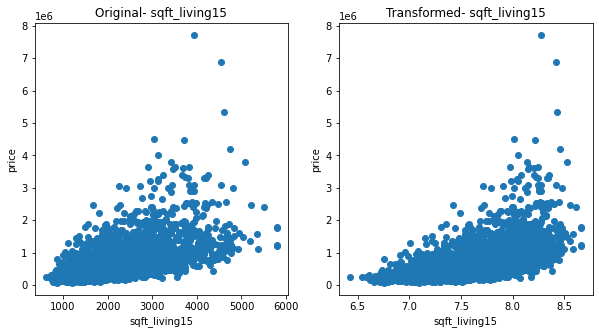

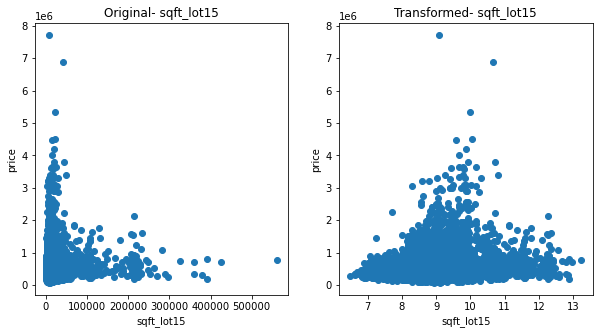

In [76]:
data_truncated_trans = np.log(data_truncated)

scatter_plot(data, data_truncated_trans)

# Could see a more uniform distribution for sqft_lot15 after transformation.

**Applying Cube - Root Transformation**

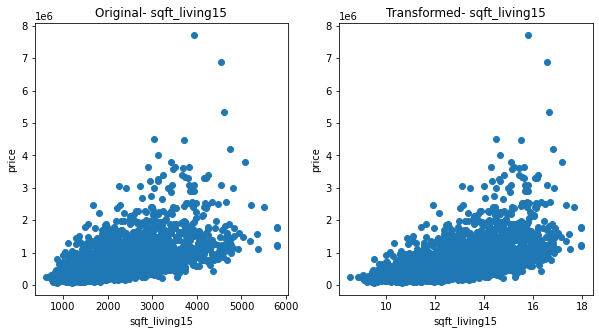

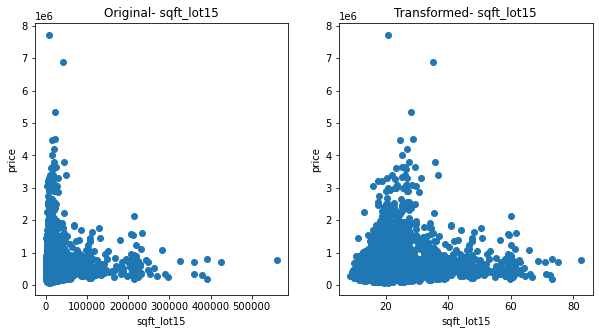

In [77]:
data_truncated_trans = np.cbrt(data_truncated)

scatter_plot(data, data_truncated_trans)

# Could see a more uniform distribution for sqft_lot15 after transformation.

**Applying Square - Root Transformation**

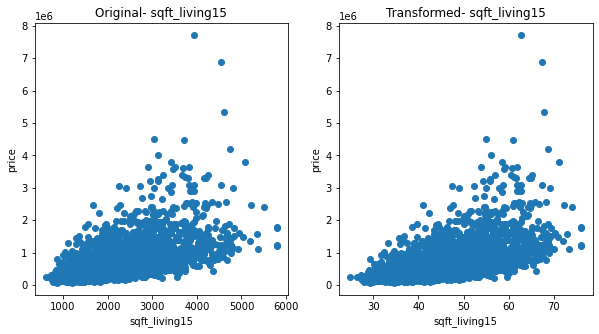

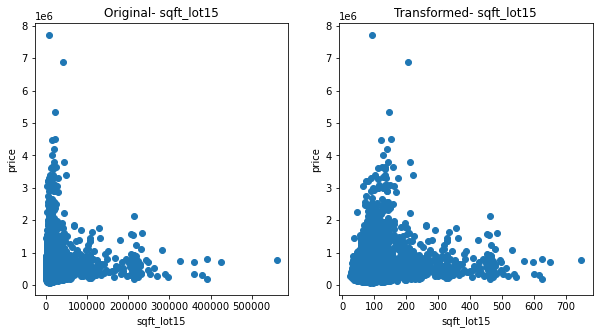

In [78]:
data_truncated_trans = np.sqrt(data_truncated)

scatter_plot(data, data_truncated_trans)

# COuld see a more uniform distribution for sqft_lot15 after transformation.

**Applying power Transformation**

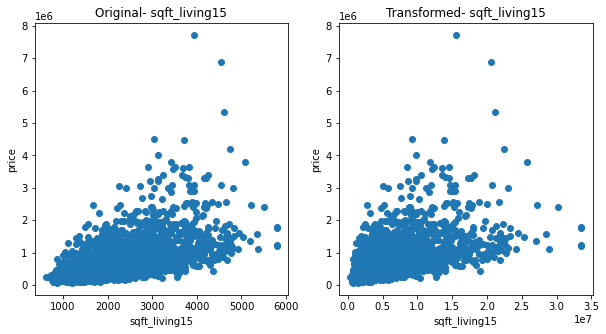

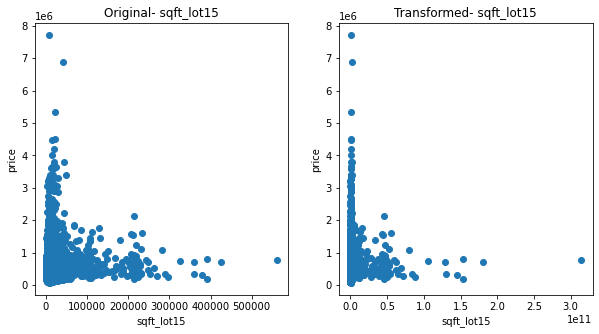

In [79]:
data_truncated_trans = np.power(data_truncated, 2)

scatter_plot(data, data_truncated_trans)

# Could not see an affect on the dribution after transformation.

**Outlier Analysis**

In [80]:
# a function is defined to plot a box plot
# the inputs are dataframes types
def box_plot(data, data_transformed):
    
    col_len = len(data_transformed.columns)
    
    
    row_n = 1
    
    for i in data_transformed.columns:
        
        plt.figure(figsize = (10,5))
        
        plt.subplot(row_n,col_len, 1)
        plt.boxplot(x = data[i])
        
        plt.xlabel('%s'%i)
        plt.title('Original- %s'%i)
        
        plt.subplot(row_n,col_len, 2)
        plt.boxplot(x=  data_transformed[i])
        
        plt.xlabel('%s'%i)
        plt.title('Transformed- %s'%i)  
        
        
        row_n =+ 1
        
        plt.show()
    
    

In [81]:
# a function is defined count the no of outliers before and after transformation
# the inputs are dataframes types
# here z -score logic is used for detecting outliers
def outlier_ana_trans(data, data_transformed):
    
    box_plot(data, data_truncated_trans)
    
    for i in data_transformed.columns:        

        z_t = stats.zscore(data_transformed[i])

        z = stats.zscore(data[i])
        
        print('\nColumn - %s'%i)

        print('Number of Outlier: ',len(z[z>3]))

        print('After Transformation')

        print('Number of Outlier: ',len(z_t[z_t>3]))
        
        

**Applying Log Transformation**

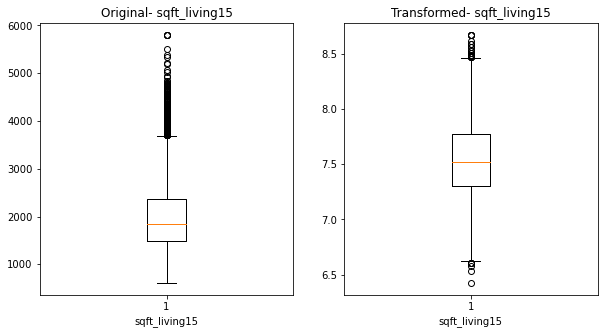

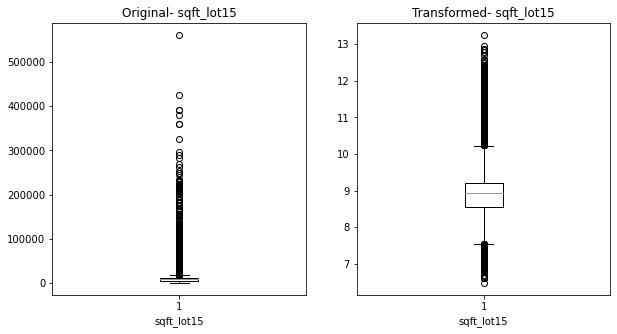


Column - sqft_living15
Number of Outlier:  104
After Transformation
Number of Outlier:  10

Column - sqft_lot15
Number of Outlier:  178
After Transformation
Number of Outlier:  186


In [82]:
data_truncated_trans = np.log(data_truncated)

outlier_ana_trans(data, data_truncated_trans)

**Applying Cube - Root Transformation**

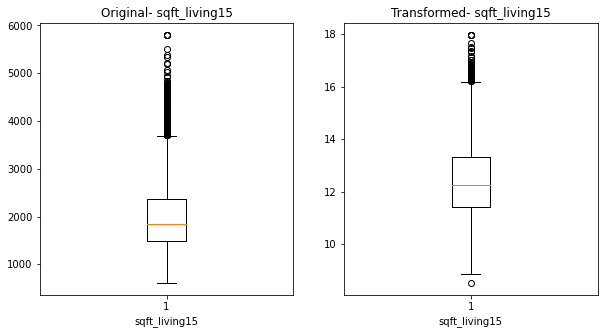

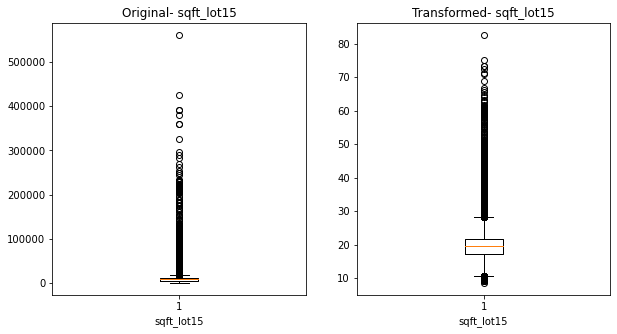


Column - sqft_living15
Number of Outlier:  104
After Transformation
Number of Outlier:  44

Column - sqft_lot15
Number of Outlier:  178
After Transformation
Number of Outlier:  218


In [83]:
data_truncated_trans = np.cbrt(data_truncated)

outlier_ana_trans(data, data_truncated_trans)

**Applying Square - Root Transformation**

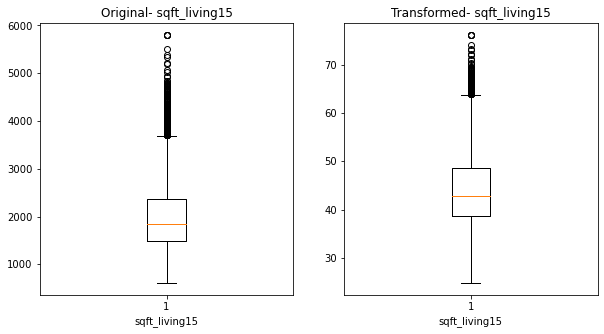

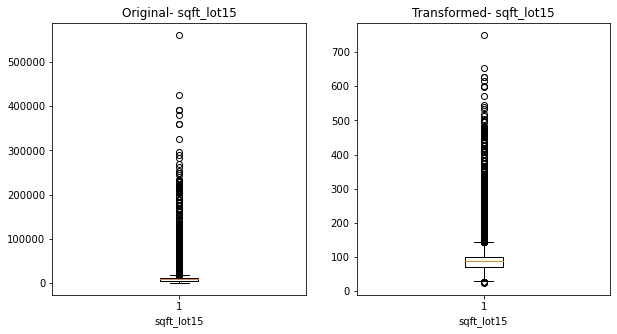


Column - sqft_living15
Number of Outlier:  104
After Transformation
Number of Outlier:  56

Column - sqft_lot15
Number of Outlier:  178
After Transformation
Number of Outlier:  210


In [84]:
data_truncated_trans = np.sqrt(data_truncated)

outlier_ana_trans(data, data_truncated_trans)

**Applying Square - Root Transformation**

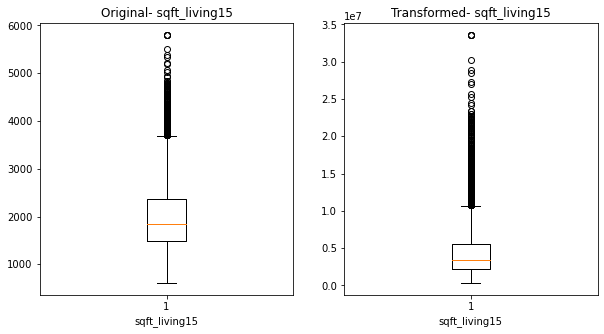

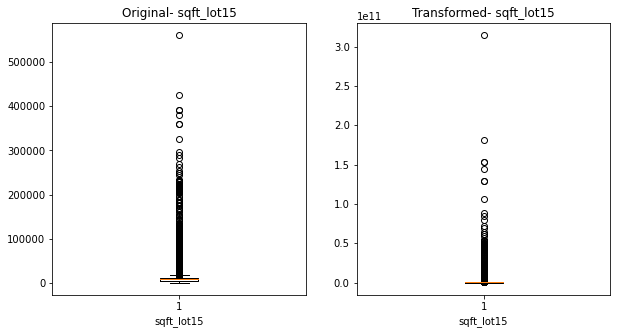


Column - sqft_living15
Number of Outlier:  104
After Transformation
Number of Outlier:  181

Column - sqft_lot15
Number of Outlier:  178
After Transformation
Number of Outlier:  104


In [85]:
data_truncated_trans = np.power(data_truncated,2)

outlier_ana_trans(data, data_truncated_trans)

**To check how the outlier treatment helped the model**

In [131]:
data_test_3 = data[['sqft_living15','sqft_lot15']].copy()

**Applying Power Transformation on sqft_lot15 as it was performing well to remove outliers**

In [149]:
lin = LinearRegression()

data_iter = pd.DataFrame()

data_iter['trans_sqft_lot15'] = np.power(data_test_3['sqft_lot15'],2)


lin.fit(data[['sqft_lot15']],data['price'])

y_pred = lin.predict(data[['sqft_lot15']])


rmse_scores = np.sqrt(mean_squared_error(data['price'],y_pred))

r2_scores = r2_score(data['price'],y_pred)


lin = LinearRegression()

trans_rmse_scores = cross_val_score(lin, data_iter,data['price'],cv=10, scoring = "neg_root_mean_squared_error")
trans_r2_scores = cross_val_score(lin, data_iter,data['price'], cv=10, scoring = "r2")


print('Original')

print('RMSE:',rmse_scores)
print('R2:',r2_scores)


print('\nTransformed')

print('RMSE: ',trans_rmse_scores.mean())
print('R2: ',trans_r2_scores.mean())

# Could see a dip after the transformation

Original
RMSE: 378353.6736613278
R2: 0.00607505846545664

Transformed
RMSE:  -377685.1169043126
R2:  -0.0028893469906117186


**Applying Log Transformation on sqft_living15 as it was performing well to remove outliers**

In [59]:
lin = LinearRegression()

data_iter = pd.DataFrame()

data_iter['trans_sqft_living15'] = np.log(data['sqft_living15'])


lin.fit(data[['sqft_living15']],data['price'])

y_pred = lin.predict(data[['sqft_living15']])


rmse_scores = np.sqrt(mean_squared_error(data['price'],y_pred))
r2_scores = r2_score(data['price'],y_pred)


lin = LinearRegression()

trans_rmse_scores = cross_val_score(lin, data_iter,data['price'],cv=10, scoring = "neg_root_mean_squared_error")
trans_r2_scores = cross_val_score(lin, data_iter,data['price'], cv=10, scoring = "r2")



print('Original')

print('RMSE:',rmse_scores)
print('R2:',r2_scores)


print('\nTransformed')

print('RMSE: ',trans_rmse_scores.mean())
print('R2: ',trans_r2_scores.mean())

# Could see a dip after the transformation

Original
RMSE: 307846.4935476725
R2: 0.34199968567496086

Transformed
RMSE:  -317097.4416162089
R2:  0.29339420787578463


**Applying Radian Transformation on lat,long**

In [30]:
lin = LinearRegression()

data_iter = pd.DataFrame()


data_iter['lat'] = np.radians(data['lat'])
data_iter['long'] = np.radians(data['long'])


lin.fit(data[['lat','long']],data['price'])

y_pred = lin.predict(data[['lat','long']])


rmse_scores = np.sqrt(mean_squared_error(data['price'],y_pred))
r2_scores = r2_score(data['price'],y_pred)


lin = LinearRegression()

trans_rmse_scores = cross_val_score(lin, data_iter,data['price'],cv=10, scoring = "neg_root_mean_squared_error")
trans_r2_scores = cross_val_score(lin, data_iter,data['price'], cv=10, scoring = "r2")



print('Original')

print('RMSE:',rmse_scores)
print('R2:',r2_scores)


print('\nTransformed')

print('RMSE: ',trans_rmse_scores.mean())
print('R2: ',trans_r2_scores.mean())

Original
RMSE: 361292.6563055277
R2: 0.09369172178975094

Transformed
RMSE:  -359508.51565452357
R2:  0.0924483955533297


**Removing Outliers**

In [160]:
data_4 = data[['price','sqft_living15','sqft_lot15']].copy()

In [164]:
z_liv = stats.zscore(data['sqft_living15'])

data_without_outliers = pd.DataFrame()

data_without_outliers = data_4[['price','sqft_living15']][z_liv<3]


lin.fit(data_without_outliers[['sqft_living15']],data_without_outliers['price'])

y_pred = lin.predict(data_without_outliers[['sqft_living15']])


rmse_scores = np.sqrt(mean_squared_error(data_without_outliers['price'],y_pred))
r2_scores = r2_score(data_without_outliers['price'],y_pred)


print('RMSE:',rmse_scores)
print('R2:',r2_scores)

RMSE: 292126.1882469639
R2: 0.30927314415389295


In [165]:
z_lot = stats.zscore(data['sqft_lot15'])

data_without_outliers = pd.DataFrame()

data_without_outliers = data_4[['price','sqft_lot15']][z_lot<3]


lin.fit(data_without_outliers[['sqft_lot15']],data_without_outliers['price'])

y_pred = lin.predict(data_without_outliers[['sqft_lot15']])


rmse_scores = np.sqrt(mean_squared_error(data_without_outliers['price'],y_pred))
r2_scores = r2_score(data_without_outliers['price'],y_pred)


print('RMSE:',rmse_scores)
print('R2:',r2_scores)

RMSE: 375876.5689004177
R2: 0.022956617739891105


In [119]:
data_all = houses[(houses.sqft_living <= 4860) & (houses.sqft_living15 <= 4050) & (houses.bathrooms <= 4.25) ].copy()

In [149]:
data_all = houses[['waterfront','bathrooms', 'sqft_living', 'grade', 'yr_built','view','sqft_living15','zipcode','price']].copy()

In [150]:
test = test_m[['waterfront','bathrooms', 'sqft_living', 'grade', 'yr_built','view','sqft_living15','zipcode','price']].copy()

In [151]:
# one-hot encoding of zipcode
one_hot_zip = pd.get_dummies(data_all.zipcode, drop_first=True)
data_all = pd.concat([data_all,one_hot_zip],axis = 1)

In [152]:
one_hot_zip = pd.get_dummies(test.zipcode, drop_first=True)
test = pd.concat([test,one_hot_zip],axis = 1)

In [129]:
data_all

,bathrooms,bedrooms,sqft_living,grade,zipcode,sqft_living15,price,98002,98003,98004,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,3.00,4,1960,7,98136,1360,604000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.50,4,5420,11,98053,4760,1225000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.00,2,1160,7,98115,1330,468000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.00,3,1430,7,98028,1780,310000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.75,3,1370,7,98074,1370,400000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,2.00,3,1490,8,98144,1400,429000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9757,2.50,4,2520,9,98056,2520,610685.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9758,3.50,4,3510,9,98136,2050,1007500.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9759,0.75,2,1020,7,98144,1020,402101.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
# Prepare x and y data 
X_train = data_all.drop("price",axis=1)
X_train = X_train.drop("zipcode",axis=1)
y_train = data_all["price"]

In [154]:
X_test = test.drop("price",axis=1)
X_test = X_test.drop("zipcode",axis=1)
y_test = test["price"]

In [155]:
# fit the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics


regressor = LinearRegression()
regressor.fit(X_train, y_train)

cv_scores = []

scores = cross_val_score(regressor, X_train, y_train, cv=10, scoring = "r2")
cv_scores.append(scores.mean())

In [156]:
scores = cross_val_score(regressor, X_train, y_train, cv=10, scoring = "neg_root_mean_squared_error")
cv_scores.append(scores.mean())

In [157]:
cv_scores

[0.7927250786628084, -171833.42606892827]

In [158]:
accuracy = regressor.score(X_test, y_test)

In [160]:
y_pred = regressor.predict(X_test)

In [161]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test,y_pred)
r2

0.8063063998692153

In [162]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

rmse

157708.33320583953

In [163]:
# find mape
epsilon = np.finfo(np.float64).eps
mape = np.abs(y_pred - y_test) / np.maximum(np.abs(y_test), epsilon)
output_errors = np.average(mape,
                               weights=None, axis=0)

np.average(output_errors, weights=None)


0.21235489137654054

**5) Model fitting step 2 - Selection**

In [62]:
# import SequentialFeatureSelector from the library for mlxtend.feature_selection for selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import datetime as dt

In [108]:
data_sel = data.copy()

# Converting the date to ordinal value and feeding it into the selection
data_sel['date'] = pd.to_datetime(data_sel['date'])

data_sel['date']=data_sel['date'].map(dt.datetime.toordinal)

# The split is been done
X = data_sel.drop(columns=['price'], axis=1)

y = data_sel['price']

In [73]:
# this function is defined to make use of different selection types like,
# Forward, Backward, Step Wise (Sequence Forward), Sequence Backward
# This function is used for Linear Regression model only
# Here the inputs are the predictor space X , target variable y,
# max_cols - maximum number of columns that are being iterated through
# another feature range_of_cols which can be excerised when we want to use a single column

# Here a line plot is plotted at the end when a range of values are given
# Here a scatter plot is plotted at the end when a single value is given

def selection_mech (X,y, max_cols = 0, range_of_cols = True):
    
    if range_of_cols == False:
        
        range_values = range(max_cols,max_cols+1)
    
    else:
        range_values = range(1,max_cols+1)
     
   # a list of combination are defined along with the selection and color with which it needs to be displayed. 
    sel_comb = [(True,False,'Fro','black'),(True,True,'Seq_Fro','blue'),
                (False,False,'Back','red'),(False,True,'Seq_Back','green')]

    plt.figure()
    
    # a loop is being run for each selection
    for for_flag,flo_flag,selection,color_line in sel_comb:

        list_n_col = []
        list_k_score = []
        
        # a loop is being run through each number of feature
        for i in range_values:
            
            # using forward and floating the selections are altered
            sfs = SFS(LinearRegression(),
                      k_features=i,
                      forward=for_flag,
                      floating=flo_flag,
                      scoring = 'r2',
                      cv = 10)

            sfs.fit(X, y)
            
            # Appending the resultant values
            list_n_col.append(selection)
            list_k_score.append(sfs.k_score_)
        
        # Plotting the values
        if range_of_cols == False:
            
            plt.scatter(list_n_col,list_k_score, label = selection, color = color_line, alpha=0.4)
        
            plt.xticks(ticks= range_values)
        
        else:
            plt.plot(list_n_col,list_k_score, label = selection, color = color_line, alpha=0.4)

        

    plt.legend()    

    plt.show()

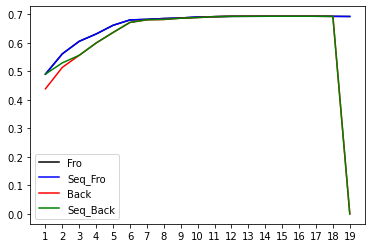

In [240]:
selection_mech(LinearRegression(),X,y,19)

# When the function is invoked, we could see that all the selection at peaking at columns at 6

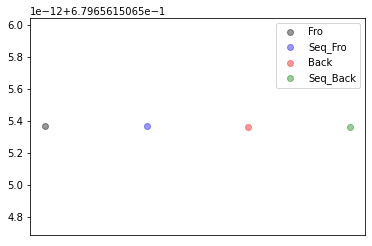

In [107]:
# The function is invoked, for visualizing the peaked value
X = data_sel.drop(columns=['price'], axis=1)

y = data_sel['price']

selection_mech(X,y,6,False)

In [111]:
# Using Forward Selection and 6 features
X = data_sel.drop(columns=['price'], axis=1)

y = data_sel['price']

sfs = SFS(LinearRegression(),
                      k_features=6,
                      forward=True,
                      floating=False,
                      scoring = 'r2',
                      cv = 10)

sfs.fit(X, y)
print('The Selected Features: ',sfs.k_feature_names_)

print('The Final Score: ',sfs.k_score_)

The Selected Features:  ('sqft_living', 'waterfront', 'view', 'grade', 'yr_built', 'lat')
The Final Score:  0.6796561506553641


**We can use Decision Tree and do selection**

In [86]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
# this function is defined to make use of different selection types like,
# Forward, Backward, Step Wise (Sequence Forward)
# This function is used for Decision Tree model only
# Here the inputs are the predictor space X , target variable y,
# max_cols - maximum number of columns that are being iterated through
# another feature range_of_cols which can be excerised when we want to use a single column

# Here a line plot is plotted at the end when a range of values are given
# Here a scatter plot is plotted at the end when a single value is given

def selection_mech_dtree (X,y, max_cols = 0, range_of_cols = True):
    
    if range_of_cols == False:
        
        range_values = range(max_cols,max_cols+1)
    
    else:
        range_values = range(1,max_cols+1)
    
    # a list of combination are defined along with the selection and color with which it needs to be displayed.
    sel_comb = [(True,False,'Fro','black'),(True,True,'Seq_Fro','blue'),
                (False,False,'Back','red')]

    plt.figure()
    
    # a loop is being run for each selection
    for for_flag,flo_flag,selection,color_line in sel_comb:

        list_n_col = []
        list_k_score = []
        
        # a loop is being run through each number of feature
        for i in range_values:
            
            # using forward and floating the selections are altered
            sfs = SFS(DecisionTreeRegressor(),
                      k_features=i,
                      forward=for_flag,
                      floating=flo_flag,
                      scoring = 'r2',
                      cv = 10)

            sfs.fit(X, y)
            
            # Appending the resultant values
            list_n_col.append(selection)
            list_k_score.append(sfs.k_score_)
         
        # Plotting the values   
        if range_of_cols == False:
            
            plt.scatter(list_n_col,list_k_score, label = selection, color = color_line, alpha=0.4)
        
            plt.xticks(ticks= range_values)
        
        else:
            plt.plot(list_n_col,list_k_score, label = selection, color = color_line, alpha=0.4)

        

    plt.legend()    

    plt.show()

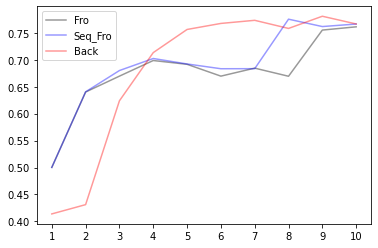

In [102]:
selection_mech_dtree(X,y,10)

# When the function is invoked, we could see that there all the selection varies result but could
# they are peaking at number of columns at 8 for Squence Forward

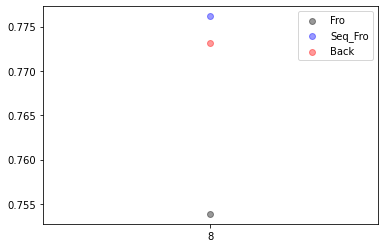

In [101]:
# The function is invoked, for visualizing the peaked value
selection_mech_dtree(X,y,8,False)

In [105]:
# Using Sequence Forward alias Step Selection with 8 features
sfs = SFS(DecisionTreeRegressor(),
                      k_features= 8,
                      forward=True,
                      floating=True,
                      scoring = 'r2',
                      cv = 10)

sfs.fit(X, y)
print('The Selected Features: ',sfs.k_feature_names_)

print('The Final Score: ',sfs.k_score_)

The Selected Features:  ('bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'lat', 'long')
The Final Score:  0.7774606442752187


**Selection - Using Transformed Data**

In [94]:
trans_data = data.copy()

In [95]:
# to bring into same scale, it is change into radians
trans_data['lat'] = np.radians(trans_data['lat'])
trans_data['long'] = np.radians(trans_data['long'])

**String Date Time to Ordinal**

In [96]:
# Converting the date to ordinal value and feeding it into the selection

trans_data['date'] = pd.to_datetime(trans_data['date'])

trans_data['date']=trans_data['date'].map(dt.datetime.toordinal)`

**Seasonality Check**

<AxesSubplot:xlabel='month', ylabel='price'>

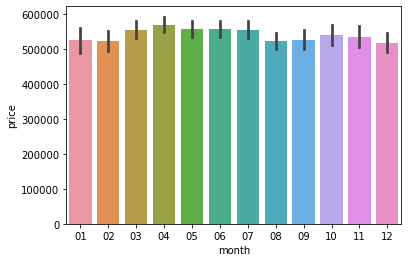

In [41]:
data_with_month = pd.DataFrame()
data_with_month['month'] = data['date'].apply(lambda x:x[4:6]).sort_values()


sns.barplot(x = data_with_month['month'], y = data['price'])

# Couldnt find any seasonality affect on months

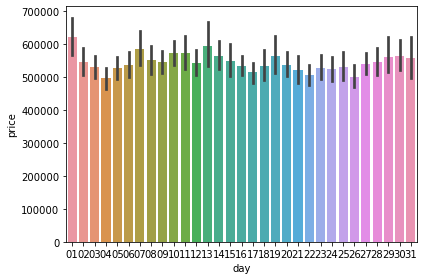

In [27]:
data_with_day = pd.DataFrame()
data_with_day['day'] = data['date'].apply(lambda x:x[6:8]).sort_values()

sns.barplot(x = data_with_day['day'], y = data['price'])

plt.tight_layout()

# Couldnt find any seasonality affect on days of the month sold

In [97]:
# there is no seasonality we can remove the date field
# Also we can drop id
trans_data.drop(columns= ['date','id'], axis =1, inplace= True)

**One Hot Encoding for zipcodes**

In [93]:
one_hot_zip = pd.get_dummies(data.zipcode, drop_first=True)

In [98]:
# Removing Zipcode as one hot encoding is done

trans_data.drop(columns= ['zipcode'], axis =1, inplace= True)

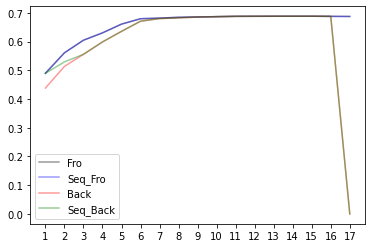

In [75]:
X = trans_data.drop(columns=['price'], axis=1)

y = trans_data['price']

selection_mech(X,y,17)

# When the function is invoked, we could see that all the selection at peaking at columns at 6

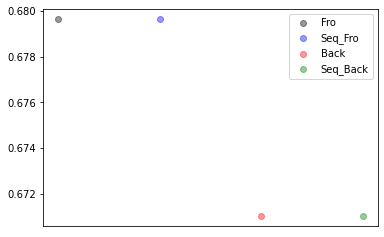

In [100]:
X = trans_data.drop(columns=['price'], axis=1)

y = trans_data['price']

# The function is invoked, for visualizing the peaked value
selection_mech(X,y,6,False)

In [106]:
# As for data it is again peaking a 6, so using Seq selection 
X = trans_data.drop(columns=['price'], axis=1)

y = trans_data['price']

sfs = SFS(LinearRegression(),
                      k_features= 6,
                      forward=True,
                      floating=False,
                      scoring = 'r2',
                      cv = 10)

sfs.fit(X, y)
print('The Selected Features: ',sfs.k_feature_names_)

print('The Final Score: ',sfs.k_score_)

# the scores have marginally changed after transformation

The Selected Features:  ('sqft_living', 'waterfront', 'view', 'grade', 'yr_built', 'lat')
The Final Score:  0.6796561506553618


In [92]:
X = trans_data.drop(columns=['price'], axis=1)

y = trans_data['price']

sfs = SFS(DecisionTreeRegressor(),
                      k_features=6,
                      forward=True,
                      floating=True,
                      scoring = 'r2',
                      cv = 10)

sfs.fit(X, y)
print('The Selected Features: ',sfs.k_feature_names_)

print('The Final Score: ',sfs.k_score_)

# The decision tree is not working well will transformed data

The Selected Features:  ('waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'lat')
The Final Score:  0.5516722183882972


**Model fitting step 3 - So, we will be selecting feature using the knowledge gained by feature engineering and EDA**

 These are the features - 'bedrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'sqft_above', 'lat', 'long'

In [299]:
X_train_1 = data[['bedrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'sqft_above', 'lat', 'long']]
y_train_1 = data['price']

In [336]:
d_tree = DecisionTreeRegressor()

# Using Cross Validation to train and test on the train data with the selected features
trans_rmse_scores = cross_val_score(d_tree, X_train_1,y_train_1,cv=10, scoring = "neg_root_mean_squared_error")
trans_r2_scores = cross_val_score(d_tree, X_train_1,y_train_1, cv=10, scoring = "r2")


print('\nCross Validation')

print('RMSE: ',trans_rmse_scores.mean())
print('R2: ',trans_r2_scores.mean())


Cross Validation
RMSE:  -173833.85397640467
R2:  0.7848467214488644


**Testing with Test Data**

In [303]:
# test data is being read
data_test = pd.read_csv('wk3_kc_house_test_data.csv')

In [304]:
# Spliting  the test data
X_test_1 = data_test[['bedrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'sqft_above', 'lat', 'long']]

y_test_1 = data_test['price']

In [359]:
# using first the default Decision Tree Settings
d_tree = DecisionTreeRegressor()

d_tree = d_tree.fit(X_train_1,y_train_1)

y_pred = d_tree.predict(X_test_1)

print('R2:',r2_score(y_test_1,y_pred))

print('RMSE:',np.sqrt(mean_squared_error(y_test_1,y_pred)))

epsilon = np.finfo(np.float64).eps
mape = np.abs(y_pred - y_test_1) / np.maximum(np.abs(y_test_1), epsilon)
output_errors = np.average(mape,
                               weights=None, axis=0)

mape_final =np.average(output_errors, weights=None)

print('MAPE: ', mape_final*100)

R2: 0.7595336777097327
RMSE: 175721.19043155556
MAPE:  19.25504068165432


**Adding one hot encoded Zipcodes**

In [317]:
X_train_2 = data[['bedrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'sqft_above', 'lat', 'long']]

X_train_2 = pd.concat([X_train_,one_hot_zip],axis = 1)

y_train_2 = data['price']

In [338]:
d_tree = DecisionTreeRegressor()

# Using Cross Validation to train and test on the train data with the selected features
trans_rmse_scores = cross_val_score(d_tree, X_train_2,y_train_2,cv=10, scoring = "neg_root_mean_squared_error")
trans_r2_scores = cross_val_score(d_tree, X_train_2,y_train_2, cv=10, scoring = "r2")


print('\nCross Validation')

print('RMSE: ',trans_rmse_scores.mean())
print('R2: ',trans_r2_scores.mean())


Cross Validation
RMSE:  -180949.87819622125
R2:  0.7677349477010551


In [319]:
# Similarly adding one hot encoding for test data

X_test_2 = data_test[['bedrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'sqft_above', 'lat', 'long']]

one_hot_zip = pd.get_dummies(data_test.zipcode, drop_first=True)

X_test_2 = pd.concat([X_test_2,one_hot_zip],axis = 1)

y_test_2 = data_test['price']

In [355]:
# using first the default Decision Tree Settings
d_tree = DecisionTreeRegressor()

d_tree = d_tree.fit(X_train_2, y_train_2)

y_pred = d_tree.predict(X_test_2)

print('R2:',r2_score(y_test_2,y_pred))

print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

epsilon = np.finfo(np.float64).eps
mape = np.abs(y_pred - y_test_2) / np.maximum(np.abs(y_test_2), epsilon)
output_errors = np.average(mape,
                               weights=None, axis=0)

mape_final =np.average(output_errors, weights=None)

print('MAPE: ', mape_final*100)

R2: 0.7374087685804243
RMSE: 183627.2439663468
MAPE:  19.185052337571374


**Dropping ID's with Duplicate Entries**

In [160]:
df = data.groupby('id')['price'].count().sort_values(ascending = False)

In [161]:
id_with_mul_entries = list(df[df.values > 1].index)

In [163]:
# making a copy of the data
data_copy = data.copy()

In [164]:
# adding the check for present of multiple extries wuing the list of ids
data_copy['multi_sales'] = data_copy.id.apply(lambda x: True if x in id_with_mul_entries else False)

In [167]:
data_copy_2 = data_copy[data_copy.multi_sales ==False]

In [168]:
data_multi = data_copy[data_copy.multi_sales == True].copy()

data_multi = data_multi.sort_values('date')

data_multi.drop_duplicates(subset=['id'], inplace = True)

In [180]:
data_final = data_copy_2.append(data_multi)

In [172]:
data_multi = data_multi.sort_values('date')

In [177]:
data_multi.drop_duplicates(subset=['id'], inplace = True)

In [182]:
X_train_3 = data_final[['bedrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'sqft_above', 'lat', 'long']]
y_train_3 = data_final['price']

In [183]:
# Spliting  the test data
X_test_3 = data_test[['bedrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'sqft_above', 'lat', 'long']]

y_test_3 = data_test['price']

In [342]:
d_tree = DecisionTreeRegressor()

# Using Cross Validation to train and test on the train data with the selected features
trans_rmse_scores = cross_val_score(d_tree, X_train_3,y_train_3,cv=10, scoring = "neg_root_mean_squared_error")
trans_r2_scores = cross_val_score(d_tree, X_train_3,y_train_3, cv=10, scoring = "r2")


print('\nCross Validation')

print('RMSE: ',trans_rmse_scores.mean())
print('R2: ',trans_r2_scores.mean())


Cross Validation
RMSE:  -178221.4341707442
R2:  0.7620529921093843


In [353]:
# using first the default Decision Tree Settings
d_tree = DecisionTreeRegressor()

d_tree = d_tree.fit(X_train_3,y_train_3)

y_pred = d_tree.predict(X_test_3)

print('R2:',r2_score(y_test_3,y_pred))

print('RMSE:',np.sqrt(mean_squared_error(y_test_3,y_pred)))

epsilon = np.finfo(np.float64).eps
mape = np.abs(y_pred - y_test_3) / np.maximum(np.abs(y_test_3), epsilon)
output_errors = np.average(mape,
                               weights=None, axis=0)

mape_final =np.average(output_errors, weights=None)

print('MAPE: ', mape_final*100)

# Could see only a marginal change in the score

R2: 0.7480421955940313
RMSE: 179870.90248657798
MAPE:  19.664745177601283


**6.Model fitting step 3**

In [261]:
X_train_4 = data[['bedrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'sqft_above', 'lat', 'long']]
y_train_4 = data['price']

In [264]:
# Spliting  the test data
X_test_4 = data_test[['bedrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'sqft_above', 'lat', 'long']]

y_test_4 = data_test['price']

In [291]:
d_tree = DecisionTreeRegressor(min_samples_split= 15,min_samples_leaf=9, random_state= 20)

# Using Cross Validation to train and test on the train data with the selected features
trans_rmse_scores = cross_val_score(d_tree, X_train_4,y_train_4,cv=10, scoring = "neg_root_mean_squared_error")
trans_r2_scores = cross_val_score(d_tree, X_train_4,y_train_4, cv=10, scoring = "r2")


print('\nCross Validation')

print('RMSE: ',trans_rmse_scores.mean())
print('R2: ',trans_r2_scores.mean())


Cross Validation
RMSE:  -181469.84613660767
R2:  0.7664290171798692


In [352]:
d_tree = DecisionTreeRegressor(min_samples_split= 15,min_samples_leaf=9, random_state= 20)

d_tree = d_tree.fit(X_train_4,y_train_4)

y_pred = d_tree.predict(X_test_4)

print('R2:',r2_score(y_test_4,y_pred))

print('RMSE:',np.sqrt(mean_squared_error(y_test_4,y_pred)))

epsilon = np.finfo(np.float64).eps
mape = np.abs(y_pred - y_test_4) / np.maximum(np.abs(y_test_4), epsilon)
output_errors = np.average(mape,
                               weights=None, axis=0)

mape_final =np.average(output_errors, weights=None)

print('MAPE: ', mape_final*100)

R2: 0.8178701687035694
RMSE: 152928.19012099208
MAPE:  16.921645845915766


**DTree Model with GridSearchCV for best hyperparameters**

In [34]:
# importing GridsearchCv package from library
from sklearn.model_selection import GridSearchCV
from sklearn import tree
#train data
X_train_5 = data[['bedrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'sqft_above', 'lat', 'long']]
y_train_5 = data['price']

#parameters to be tuned 
parameters={'min_samples_split' : range(20,100,20),'max_depth': range(2,12,2)}

#GridSearch cross valition with CV=5 , the parameters to be tuned as above
clf_tree=tree.DecisionTreeRegressor()
clf=GridSearchCV(clf_tree,parameters,cv=5)
clf.fit(X_train_5,y_train_5)

#parameters giving the best score
print('\nclf.best_estimator_:')
print(clf.best_estimator_)

trans_rmse_scores = cross_val_score(clf.best_estimator_, X_train_5,y_train_5,cv=10, scoring = "neg_root_mean_squared_error")
trans_r2_scores = cross_val_score(clf.best_estimator_, X_train_5,y_train_5, cv=10, scoring = "r2")


print('\nCross Validation')

print('RMSE: ',trans_rmse_scores.mean())
print('R2: ',trans_r2_scores.mean())


clf.best_estimator_:
DecisionTreeRegressor(max_depth=10, min_samples_split=20)

Cross Validation
RMSE:  -174118.2348222317
R2:  0.7835156508156735


In [37]:
# Spliting  the test data
X_test_5 = data_test[['bedrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'sqft_above', 'lat', 'long']]
y_test_5 = data_test['price']

In [41]:
y_pred = clf.best_estimator_.predict(X_test_5)

print('R2:',r2_score(y_test_5,y_pred))

print('RMSE:',np.sqrt(mean_squared_error(y_test_5,y_pred)))

R2: 0.8034166846311277
RMSE: 158880.40334243907
